<div style="border:solid green 3px; padding: 20px">

<b>Привет!</b>

Меня зовут Сороколетов Илья и я буду проверять твой проект. 

Предлагаю общаться на «**ты**», но если тебе будет комфортнее общаться на «**вы**», то сообщи об этом в комментариях)


Для твоего удобства, я буду выделять свои комментарии следующим образом:

<div class="alert alert-danger">
<b>❌ Комментарий ревьюера v1:</b> Самые важные замечания. Они указывают на ключевые моменты, которые влияют на конечный результат проекта. </div>

<div class="alert alert-warning">
<b>⚠️ Комментарий ревьюера v1:</b> Советы или замечания, которые помогут сделать твою работу лучше, но необязательны к выполнению.

</div>

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> Так я выделяю все остальные комментарии.</div>


Пометками <b>v1-v2-v3-...</b> я буду отмечать версию проверки. Так ты сможешь быстро найти мои новые комментарии.

Давай работать над проектом в диалоге: если ты что-то меняешь в проекте по моим рекомендациям — пиши об этом. Выбери для своих комментариев какой-то заметный цвет, так мне будет легче отследить изменения, например вот так:
    
<div class="alert alert-info">
<b>Комментарий студента:</b>
<br>
</div>

<b>Пожалуйста, не перемещай, не изменяй и не удаляй мои комментарии.</b> Если ты оставляешь свои комментарии, то делай это под моими, чтобы сообщения были расположены в хронологическом порядке. Всё это поможет выполнить повторную проверку твоего проекта быстрее. 

Перед отправкой работы я рекомендую нажимать Kernel -> Restart & Run All. Это перезапустит ядро и по очереди выполнит все ячейки. Так ты сможешь проверить, что всё работает корректно. Кнопка Kernel находится в панели сверху

Обязательно задавай вопросы если они возникнут, а я перехожу к проверке)

P.S. На всякий случай, я оставлю пустой шаблон для твоих комментариев ниже. Кликни два раза на мой комментарий, скопируй последние четыре строчки кода и вставляй их в пустую ячейку там, где ты хочешь оставить комментарий. Не забудь только перед этим сменить тип ячейки на Markdown. Быстро это можно сделать так: кликнуть на ячейку - нажать ESC - нажать M. 
    
    
<div class="alert alert-info">
<b>Комментарий студента:</b>
<br>Удали этот текст и вместо него напиши свой комментарий 🙂
</div>

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откройте файл с данными и изучите общую информацию. 

Импортируем библиотеку pandas и сохраним ее в качестве переменной pd.

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None) #увеличение максимального количества отображаемых столбцов таблицы с данными

Откроем таблицу с данными /datasets/real_estate_data.csv и сохраним ее в переменной data.

In [2]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep = '\t')

Выведем первые 20 строк таблицы на экран.

In [3]:
display(data.head(20))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


<div class="alert alert-warning">
<b>⚠️ Комментарий ревьюера v1:</b> 
<br>Обрати внимание, что часть столбцов заменилась на "...". Чтобы это исправить, нужно увеличить максимальное количество отображающихся столбцов командой

	pd.set_option('display.max_columns', None)
</div>

<div class="alert alert-info">
<b>Комментарий Екатерины Тиньковой:</b>
Добавила pd.set_option('display.max_columns', None) после импорта библиотеки pandas <br>
</div> 

Выведем основную информацию о таблице с данными на экран и посмотрим количество ненулевых значений в каждом столбце таблицы.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

С помощью метода describe() выведем статистическую информацию по колонке last_price таблицы data, где в count указано количество строк в столбце, в mean - среднее значение столбца, в std - стандартное отклонение, минимальные (min) и максимальные (max) значения, а также граница каждого квартиля - 25%, 50% и 75%. 

С помощью метода round сделаем округление до 1 знака после запятой. 

In [5]:
round(data.describe(), 1)

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.0,23699.0,23699.0,23699.0,14504.0,23613.0,21796.0,23699.0,21421.0,12180.0,18157.0,18180.0,18181.0,8079.0,18181.0,9110.0,20518.0
mean,9.9,6541548.8,60.3,2.1,2.8,10.7,34.5,5.9,10.6,1.2,28793.7,14191.3,0.6,490.8,0.8,518.0,180.9
std,5.7,10887013.3,35.7,1.1,1.3,6.6,22.0,4.9,5.9,1.1,12630.9,8608.4,0.8,342.3,0.9,277.7,219.7
min,0.0,12190.0,12.0,0.0,1.0,1.0,2.0,1.0,1.3,0.0,0.0,181.0,0.0,1.0,0.0,13.0,1.0
25%,6.0,3400000.0,40.0,1.0,2.5,5.0,18.6,2.0,7.0,0.0,18585.0,9238.0,0.0,288.0,0.0,294.0,45.0
50%,9.0,4650000.0,52.0,2.0,2.6,9.0,30.0,4.0,9.1,1.0,26726.0,13098.5,0.0,455.0,1.0,502.0,95.0
75%,14.0,6800000.0,69.9,3.0,2.8,16.0,42.3,8.0,12.0,2.0,37273.0,16293.0,1.0,612.0,1.0,729.0,232.0
max,50.0,763000000.0,900.0,19.0,100.0,60.0,409.7,33.0,112.0,5.0,84869.0,65968.0,3.0,3190.0,3.0,1344.0,1580.0


Построим общую гистограмму для всех числовых столбцов таблицы.

<div class="alert alert-warning">
<b>⚠️ Комментарий ревьюера v1:</b> 
<br>describe можно было бы применить разом ко всем датафрейму)
</div>

<div class="alert alert-info">
<b>Комментарий Екатерины Тиньковой:</b>
Удалила вызов метода describe() и применила ко всему датафрейму <br>
</div> 

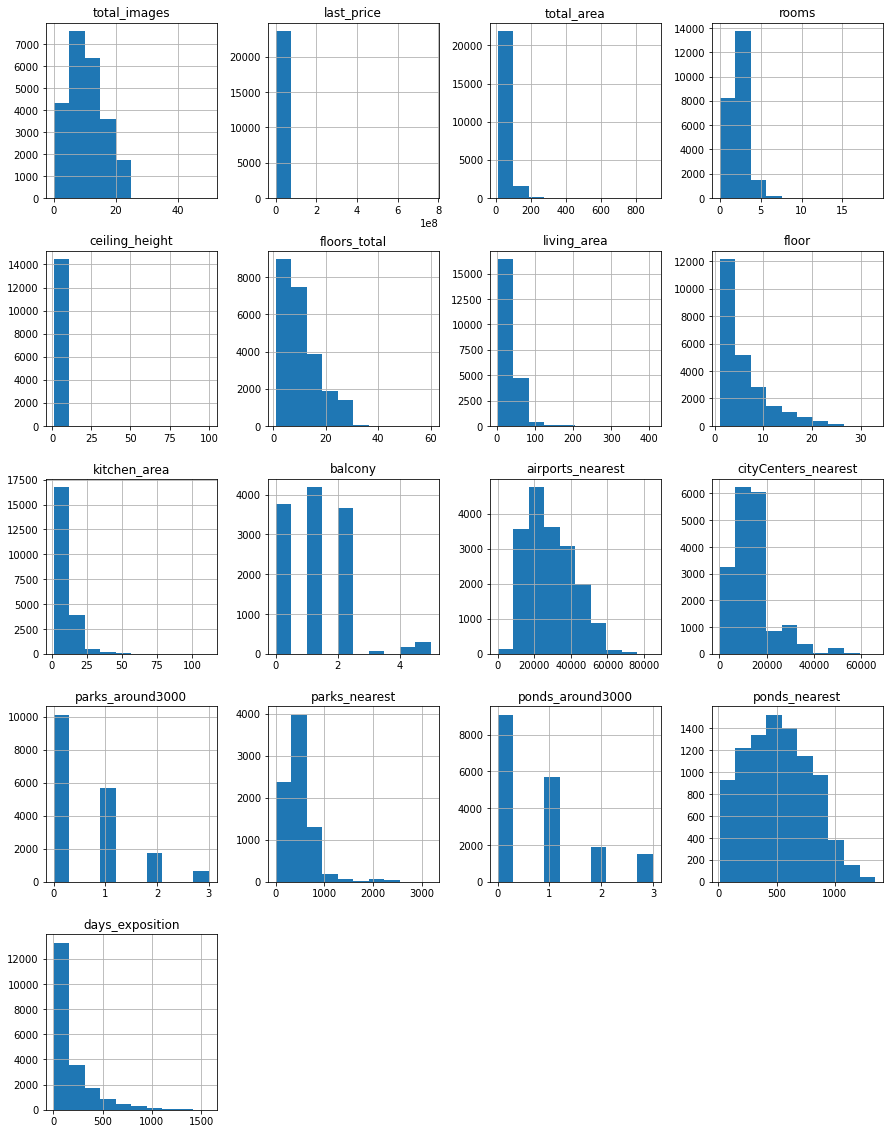

In [6]:
data.hist(figsize=(15, 20));

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Графики построено верно! 
</div>
	
<div class="alert alert-warning">
<b>⚠️ Комментарий ревьюера v1:</b> 
<br>Если после кода вызывающего график добавить ";", то мы избавимся от строчки над графиком)
</div>

<div class="alert alert-info">
<b>Комментарий Екатерины Тиньковой:</b>
Большое спасибо за то, что подсказал про ";" - очень полезная штука. Применила ко всем графикам. Отдельное спасибо за подсказку про describe(). <br>
</div> 

Таким образом, всего в таблице 23699 записи. Для целого ряда столбцов есть пропущенные значения и некорректный тип данных. По ряду признаков есть аномальные значения.

Кроме того, у некоторых столбцов неверно задан тип данных: 1) у колонки first_day_exposition тип данных object, хотя должен быть datetime; 2) у колонки floors_total тип данных float, хотя должен быть int; 3) у колонки is_apartment - тип данных должен быть bool, а не object; 4) у колонок balcony, airport_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest, day_exposition - тип данных должен быть int, а не float. 

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Всё верно! Рекомендую создать универсальную функцию, которая будет на вход принимать датафрейм, а на выходе будет выводить все необходимые характеристики поочередно применяя методы head, describe, info, duplicated и т.п.
</div>

### Предобработка данных

Выведем количество пропущенных значений с помощью двух методов isna и sum. 

In [7]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Таким образом видно, что есть пропущенные значения в следующих столбцах таблицы: 
- ceiling_height;
- floors_total;
- living_area;
- is_apartment;
- kitchen_area;
- balcony;
- locality_name;
- airports_nearest;
- cityCenters_nearest;
- parks_around3000;
- parks_nearest;
- ponds_around3000;
- ponds_nearest;
- days_exposition. 

Посмотрим данные, содержащиеся в каждом столбце и где обнаружены пропуски данных, по отдельности с помощью метода value_counts и отсортируем данные по убыванию с помощью метода sort_values. 

In [8]:
print(data['ceiling_height'].value_counts().sort_values(ascending=False))
print(data['floors_total'].value_counts().sort_values(ascending=False))
print(data['living_area'].value_counts().sort_values(ascending=False))
print(data['is_apartment'].value_counts().sort_values(ascending=False))
print(data['kitchen_area'].value_counts().sort_values(ascending=False))
print(data['balcony'].value_counts().sort_values(ascending=False))
print(data['locality_name'].value_counts().sort_values(ascending=False))
print(data['airports_nearest'].value_counts().sort_values(ascending=False))
print(data['cityCenters_nearest'].value_counts().sort_values(ascending=False))
print(data['parks_around3000'].value_counts().sort_values(ascending=False))
print(data['parks_nearest'].value_counts().sort_values(ascending=False))
print(data['ponds_around3000'].value_counts())
print(data['ponds_nearest'].value_counts().sort_values(ascending=False))
print(data['days_exposition'].value_counts().sort_values(ascending=False))

2.50    3515
2.60    1646
2.70    1574
3.00    1112
2.80     993
        ... 
3.68       1
1.75       1
5.00       1
4.80       1
4.65       1
Name: ceiling_height, Length: 183, dtype: int64
5.0     5788
9.0     3761
16.0    1376
12.0    1362
4.0     1200
10.0    1174
25.0    1075
6.0      914
17.0     833
3.0      668
7.0      592
14.0     553
18.0     505
24.0     469
8.0      390
2.0      383
15.0     365
23.0     352
19.0     339
22.0     286
20.0     271
13.0     229
11.0     203
27.0     164
21.0     158
26.0     124
1.0       25
35.0      24
28.0      21
36.0       3
37.0       1
34.0       1
33.0       1
60.0       1
29.0       1
52.0       1
Name: floors_total, dtype: int64
18.00     882
17.00     675
30.00     598
16.00     486
20.00     481
         ... 
16.63       1
174.30      1
14.95       1
33.08       1
16.74       1
Name: living_area, Length: 1782, dtype: int64
False    2725
True       50
Name: is_apartment, dtype: int64
6.00     1300
10.00    1262
8.00     1110
9.00 

Так как при выводе первых 20 строк таблицы на экран в столбце days_exposition NaN встречается у объявлений 2019 г., сделаем предположение о том, что объявление свежее. 

В столбце balcony также встречаются значения NaN, из чего следует предположение, что у объекта отсутствует балкон. 

Заменим NaN в столбцах days_exposition и balcony на 0 и перезапишем данные в них с помощью метода fillna. С помощью метода astype() изменим тип данных для колонок balcony и days_exposition на int. Убедимся, что значения перезаписались. Вызовем метод info и убедимся, что в данных столбцах больше нет пропущенных значений и что для перечисленных колонок тип данных изменился на int().

In [9]:
data['days_exposition'] = data['days_exposition'].fillna(0).astype('int')
data['balcony'] = data['balcony'].fillna(0).astype('int')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               23699 non-null  int64  
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

При выводе первых 20 строк таблицы на экран также видно, что в столбце is_apartment изначально данные должны быть представленны булевыми значениями. 

Заменим пропуски значений в столбце is_apartment на False, перезапишем данные в столбце и изменим тип данных с object на bool, т. к. изначально предполагалось, что данные в данном столбце должны отвечать параметру "Является апартаментами или нет?" - True или False соответственно. С помощью метода info убедимся в изменении типа данных в стобце и в том, что пропуска данных в нем больше нет.

In [10]:
data['is_apartment'] = data['is_apartment'].fillna(False)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          23699 non-null  bool   
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               23699 non-null  int64  
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Выведем уникальные значения столбца 'locality_name' с помощью метода unique() и отсортируем по алфавиту с помощью метода sort_values().

In [11]:
data['locality_name'].sort_values().unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской поселок Большая Ижора', 'городской поселок Янино-1',
       'городской посёлок Будогощь', 'городской посёлок Виллози',
       'городской посёлок Лесогорский', 'городской посёлок Мга',
       'городской посёлок Назия', 'городской посёлок Новоселье',
       'городской посёлок Павлово', 'городской посёлок Рощино',
       'городской посёлок Свирьстрой', 'городской посёлок Совет

Удалим неявные дубликаты из столбца 'locality_name' с помощью методов str и replace().

In [12]:
data['locality_name'] = data['locality_name'].str.replace("посёлок", "поселок")
data['locality_name'] = data['locality_name'].str.replace("поселок городского типа", "поселок")
data['locality_name'] = data['locality_name'].str.replace("городской поселок", "поселок")
data['locality_name'] = data['locality_name'].str.replace("поселок при железнодорожной станции", "поселок")
data['locality_name'] = data['locality_name'].str.replace("поселок станции", "поселок")
data['locality_name'] = data['locality_name'].str.replace("коттеджный поселок", "поселок")

Проверим, что заменили неправильные названия путем повторного вызова методов sort_values() и unique().

In [13]:
data['locality_name'].sort_values().unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'деревня Агалатово', 'деревня Аро', 'деревня Батово',
       'деревня Бегуницы', 'деревня Белогорка', 'деревня Большая Вруда',
       'деревня Большая Пустомержа', 'деревня Большие Колпаны',
       'деревня Большое Рейзино', 'деревня Большой Сабск', 'деревня Бор',
       'деревня Борисова Грива', 'деревня Ваганово', 'деревня Вартемяги',
       'деревня Вахнова Кара', 'деревня Выскатка

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Супер! Здесь всё верно)
</div>

Как видно, неявные дубликаты были удалены, количество уникальных значений сократилось. 

Изменим тип данных колонки last_price с float на int с помощью метода astype().

In [14]:
data['last_price'] = data['last_price'].astype('int')

Проверим высоту потолков менее 2 метров и более 5 метров. 

In [15]:
data[data['ceiling_height'] < 2]['ceiling_height'].count()

3

In [16]:
data[data['ceiling_height'] > 5]['ceiling_height'].count()

36

Ранее с помощью метода describe() было вычислено максимальное и минимальное значение по столбцу ceiling_height - 1 и 100 метров соответственно. Мы понимаем, что навряд ли есть квартиры с такой высотой потолков, поэтому делаем предположение, что в данном случае была допущена ошибка. В связи с этим производим замену высоты потолков в данных объектах недвижимости на медианное значение, составляющее 2,72 м.   

Также используем медианное значение для заполнения пропусков в данном столбце и выполним проверку.

In [17]:
data.loc[data['ceiling_height'].isnull(), 'ceiling_height'] = data['ceiling_height'].median()
data.loc[data['ceiling_height']<=2, 'ceiling_height'] = data['ceiling_height'].median()
data.loc[data['ceiling_height']>=5, 'ceiling_height'] = data['ceiling_height'].median()
data[data['ceiling_height'].isnull()]['ceiling_height'].count()

0

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Согласен с таким решением, так как основная часть данных в этом столбце находится в небольшом диапазоне.
</div>

Убедимся в том, что аномальные значения в столбце ceiling_height были заменены на медианные путем вызова метода describe().

In [18]:
data['ceiling_height'].describe()

count    23699.000000
mean         2.696248
std          0.214469
min          2.200000
25%          2.600000
50%          2.650000
75%          2.700000
max          4.900000
Name: ceiling_height, dtype: float64

Переведем столбец с датой в формат даты без времени, т.к. время не указано и не имеет значение для проводимого исследования. 

In [19]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format = '%Y-%m-%d')

Разберемся с пропусками в столбце floors_total. Т. к. точное количество этажей на основании табличных данных определить не представляется возможным, применение медианы или среднего значения в данном случае не является целесообразным, т. к. этажность разных объектов недвижимости может быть любой. Также не имеет смысла брать максимальное значение в данном столбце, т.к. количество этажей в доме может быть меньше заявленной величины.

В связи с этим произведем замену пропусков в данных на этаж квартиры и получим разнообразие среди положений квартир в доме. Действие по замене будем производить с помощью двух методов - isnull() и fillna(). Изменение типа данных в столбце произведем с помощью метода astype(). 

In [20]:
data['floors_total'] = data['floors_total'].fillna(data['floor']).astype('int') # заполним пропуски этим значением
data[data['floors_total'].isnull()]['floors_total'] # проведем проверку

Series([], Name: floors_total, dtype: int64)

<div class="alert alert-warning">
<b>⚠️ Комментарий ревьюера v1:</b> 
<br>Если мы заполняем таким способом, то нужно делать проверку, а не превышает ли этаж, на котором квартира общую этажность? Можно заменить на этаж квартиры либо оставить как есть
</div>

<div class="alert alert-info">
<b>Комментарий Екатерины Тиньковой:</b>
Спасибо за комментарий, выше заменила этажность в пропущенных значениях на этаж квартиры чтобы исключить вероятность ошибки. <br>
</div> 

In [21]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area              1903
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2278
balcony                     0
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition             0
dtype: int64

При вызове метода isna() видно, что пропущенные значения остались в 3-х столбцах - living_area, kitchen_area, locality_name. Пропущенные значения в столбце locality_name оставляем как есть, т.к. причина пропуска данных неизвестна и мы не можем указать случайное местоположение объекта.

Относительно столбцов living_area, kitchen_area - можно посчитать средний процент жилой площади и площади кухни от всей площади по всей выборке и высчитать для строк с пропусками жилую площадь как вариант, но мы не будем этого делать, т.к. на мой взгляд, данные в этих столбцах должны быть точными, а не примерными, т.к. прежде всего при покупке квартиры покупатель обращает внимание на площадь квартиры в целом, жилую площадь и площадь кухни помимо прочих критериев.

Замену пропусков данных в столбцах airports_nearest, cityCenters_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest также производить не будем и оставим все как есть, т. к. расстояние до аэропорта, центра города и парков, а также ближайших прудов и прудов не представляется возможным определить, а использовать медианное или среднее значение в данном случае нецелесообразно. Тем более, что данные добавлялись вручную после внесения основной информации по объекту недвижимости.

При вызове метода describe() в первой части работы также были обнаружены аномальные значения в столбцах со стоимостью квартиры, количеством комнат, общей и жилой площадями квартиры, а также площадью кухни. 

Изучим и исправим аномалии в каждом из этих столбцов. 

Начнем со столбца со стоимостью квартиры. Из метода describe() видно, что минимальное значение - 12190 руб., а максимальное 763 млн. руб. за квартиру. Логично предположить, что при заполнении таблицы была допущена ошибка в данных.

Проанализировав данные в интернете по рынку недвижимости в Санкт-Петербурге, в 2016-2019 г. средняя цена была: 
- 2016 г.: однокомнатная квартира - 3 226 278 руб., двухкомнатная квартира - 4 397 126 руб., трехкомнатная квартира - 5 530 863 руб.; 
- 2017 г.: однокомнатная квартира - 3 666 226 руб., двухкомнатная квартира - 5 297 742 руб., трехкомнатная квартира - 6 828 226 руб.; 
- 2018 г.: однокомнатная квартира - 4 129 194 руб., двухкомнатная квартира - 6 232 806 руб., трехкомнатная квартира - 8 460 484 руб.; 
- 2019 г.: однокомнатная квартира - 4 498 049 руб., двухкомнатная квартира - 6 496 581 руб., трехкомнатная квартира - 9 282 632 руб.
* Данные по ценовой статистике по годам взяты с сайта https://www.realtymag.ru/sankt-peterburg/kvartira/prodazha/prices/

Т.к. мы анализируем данные за несколько периодов и не только в отношении Санкт-Петербурга, но и ближайших к нему городов, целесообразно сделать ограничение по минимальной (в 2 млн. руб.) и максимальной (30 млн. руб.) ценам. Т. к. квартиры продаются в разных состояниях: с отделкой или без, с дизайнерским ремонтом и планировкой или без, с мебелью или без мебели и т.д., студии, свободной планировки, многокомнатные квартиры, расположенные в центре, на  окраине и в ближайших населенных пунктах,  целесообразнее всего исключить значения ниже 2 млн. руб. и свыше 40 млн. руб.

In [22]:
#проверим количество квартир со стоимостью ниже 2 млн. руб. 
data[data['last_price'] < 2000000]['last_price'].count()

1374

In [23]:
#проверим количество квартир со стоимостью свыше 40 млн. руб. 
data[data['last_price'] > 40000000]['last_price'].count()

182

In [24]:
#исключим квартиры со стоимостью ниже 2 млн. руб. и свыше 40 млн. руб. и сохраним в переменной data['last_price']
data['last_price'] = data.loc[(data['last_price'] > 2000000)&(data['last_price'] < 40000000),'last_price']

#для определения NaN в столбцеиспользуем метод isnull
data[data['last_price'].isnull()]['last_price'].count()

#затем для удаления всех нечисловых значений используем pd.to_numeric с параметром errors='coerce' для замены всех нечисловых значений на NaN
data['last_price'] = pd.to_numeric(data['last_price'], errors='coerce')

#удалим все строки с NaN с помощью метода dropna
data = data.dropna(subset=['last_price'])

Проделаем аналогичные действия с количеством комнат, общей и жилой площадями квартиры, а также площадью кухни, где также обнаружены аномальные значения.

Известно, что в квартире не может быть менее 1 комнаты, поэтому такие значения в таблице примем за аномалии. Кроме того, примем по внимание тот факт, что в Санкт-Петербурге есть жилые дома, построенные в 18-19 вв., где квартиры могут занимать целые этажи, а также бывшие коммунальные квартиры с количеством комнат более 6-8. Не забываем тажке про современные постройки со свободной планировкой и двухуровневые квартиры. Поэтому целесообразно считать, что аномалиями будут являться квартиры с количеством комнат более 10. 

In [25]:
#проверим количество квартир с количеством комнат меньше 1 
print('Количество квартир с количеством комнат меньше 1:', data[data['rooms'] < 1]['rooms'].count())

#проверим количество квартир с количеством комнат больше 10 
print('Количество квартир с количеством комнат больше 10:', data[data['rooms'] > 10]['rooms'].count())

Количество квартир с количеством комнат меньше 1: 170
Количество квартир с количеством комнат больше 10: 6


По статистике на российском рынке недвижимости встречаются квартиры с площадью от 12 до 250 м2. Поэтому предлагаю использовать данные показатели в качестве границ для определения аномальных значений для общей и жилой площадей.

Относительно площади кухни - минимальные требования по площади кухни в РФ составляет 4-6 м2, в то время как, максимальная площадь кухни не ограничена. При определении максимально возможной площади кухни будем руководствоваться здравым смыслом и статистикой, и площадь кухни свыше 60 м2 будем принимать за аномалию. 

In [26]:
#проверим количество квартир с общей и жилой площадью < 12 м2: 
print('Количество квартир с общей площадью < 12 м2:', data[data['total_area'] < 12]['total_area'].count())
print('Количество квартир с жилой площадью < 12 м2:', data[data['living_area'] < 12]['living_area'].count())

#проверим количество квартир с общей и жилой площадью > 250 м2:
print('Количество квартир с общей площадью > 250 м2:', data[data['total_area'] > 250]['total_area'].count())
print('Количество квартир с жилой площадью > 250 м2:', data[data['living_area'] > 250]['living_area'].count())

#проверим количество квартир с площадью кухни < 4 м2 и > 60 м2:
print('Количество квартир с площадью кухни < 4 м2:', data[data['kitchen_area'] < 4]['kitchen_area'].count())
print('Количество квартир с площадью кухни > 60 м2:', data[data['kitchen_area'] > 60]['kitchen_area'].count())


Количество квартир с общей площадью < 12 м2: 0
Количество квартир с жилой площадью < 12 м2: 121
Количество квартир с общей площадью > 250 м2: 46
Количество квартир с жилой площадью > 250 м2: 2
Количество квартир с площадью кухни < 4 м2: 24
Количество квартир с площадью кухни > 60 м2: 7


In [27]:
#исключим аномалии для rooms
data['rooms'] = data.loc[(data['rooms'] > 0)&(data['rooms'] < 10),'rooms']
data[data['rooms'].isnull()]['rooms'].count()
data['rooms'] = pd.to_numeric(data['rooms'], errors='coerce')
data = data.dropna(subset=['rooms'])

#исключим аномалии для total_area
data['total_area'] = data.loc[(data['total_area'] > 12)&(data['total_area'] < 250),'total_area']
data[data['total_area'].isnull()]['total_area'].count()
data['total_area'] = pd.to_numeric(data['total_area'], errors='coerce')
data = data.dropna(subset=['total_area'])

#исключим аномалии для living_area
data['living_area'] = data.loc[(data['living_area'] > 12)&(data['living_area'] < 250),'living_area']
data[data['living_area'].isnull()]['living_area'].count()
data['living_area'] = pd.to_numeric(data['living_area'], errors='coerce')
data = data.dropna(subset=['living_area'])

#исключим аномалии для kitchen_area
data['kitchen_area'] = data.loc[(data['kitchen_area'] > 4)&(data['kitchen_area'] < 60),'kitchen_area']
data[data['kitchen_area'].isnull()]['kitchen_area'].count()
data['kitchen_area'] = pd.to_numeric(data['kitchen_area'], errors='coerce')
data = data.dropna(subset=['kitchen_area'])

Проверим избавление от аномальных значений в вышеуказанных столбцах путем повторного вызова метода describe().

In [28]:
round(data.describe(), 2)

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,19433.00,19433.00,19433.00,19433.0,19433.00,19433.00,19433.00,19433.00,19433.00,19433.00,15934.00,15952.00,15953.00,7050.00,15953.00,7854.00,19433.00
mean,10.16,6146494.98,59.81,2.1,2.70,10.92,34.24,6.02,10.46,0.63,28779.24,14313.40,0.60,489.02,0.75,522.51,159.74
std,5.69,4357236.10,27.32,1.0,0.21,6.51,18.25,4.89,5.07,0.98,12669.73,8601.13,0.79,336.15,0.93,277.29,215.92
min,0.00,2006000.00,20.00,1.0,2.25,1.00,12.08,1.00,4.10,0.00,0.00,181.00,0.00,1.00,0.00,13.00,0.00
25%,6.00,3680000.00,41.01,1.0,2.60,5.00,19.00,3.00,7.20,0.00,18462.00,9541.75,0.00,288.00,0.00,301.00,22.00
50%,10.00,4840000.00,53.60,2.0,2.65,9.00,30.60,5.00,9.40,0.00,26752.00,13151.00,0.00,455.00,0.00,507.00,78.00
75%,14.00,6900000.00,70.40,3.0,2.70,16.00,43.00,8.00,12.00,1.00,37282.25,16275.00,1.00,611.00,1.00,733.00,204.00
max,50.00,39990000.00,249.90,9.0,4.80,60.00,184.00,33.00,58.40,5.00,84869.00,65968.00,3.00,3190.00,3.00,1344.00,1580.00


<div class="alert alert-warning">
<b>⚠️ Комментарий ревьюера v1:</b> 
<br>Лучше оставить их как есть.
</div>

<div class="alert alert-info">
<b>Комментарий Екатерины Тиньковой:</b>
Я удалила код, где в расстояниях до NaN заменяла на 0. Оставила данные как есть. <br>
</div> 

Таким образом, была произведена предобработка данным для выполнения исследования, а именно: 
    
    - устранены неявные дубликаты в местоположении объекта недвижимости;
    - приведен формат даты размещения объявления в читабельный вид;
    - заполнены пропуски в столбцах, где это возможно, медианными значениями или 0, например, в количестве балконов;
    - преобразован тип данных в столбцах в зависимости от содержащихся в них данных;
    - найдены и устранены выбивающиеся значения. 

<div class="alert alert-danger">
<b>❌ Комментарий ревьюера v1:</b> 
<br>Давай изучим аномалии в других столбцах. Посмотри какие значения есть в столбцах со стоимостью квартиры, количеством комнат и общей площадью. Кажется, в них есть значения, которые сильно выделяются на общем фоне (слишком высокие). Не забудь проверить какое количество данных мы в итоге отбрасываем. Это количество не должно превышать 10% от изначального объёма данных. C этим может помочь следующий код

	new_data.shape[0] / old_data.shape[0]
</div>

<div class="alert alert-info">
<b>Комментарий Екатерины Тиньковой:</b>
Разобралась с аномалиями в стоимости квартиры, количестве комнат и площадями. Выше прописала код, как я это сделала. <br>
</div> 

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v2:</b>
<br>Отлично! Теперь всё верно)
</div>

### Посчитайте и добавьте в таблицу новые столбцы

Посчитаем цену квадратного метра по каждому объекту и добавим результы расчетов в столбец price_per_sqmeter и приведем к типу int для удобства с помощью метода astype().

In [29]:
data['price_per_sqmeter'] = data['last_price'] / data['total_area']
data['price_per_sqmeter'] = data['price_per_sqmeter'].astype('int')

Создадим столбцы с днем недели, месяцем и годом публикации объявления.

In [30]:
data['weekday_exposition'] = data['first_day_exposition'].dt.weekday
data['month_exposition'] = data['first_day_exposition'].dt.month
data['year_exposition'] = data['first_day_exposition'].dt.year

Для того, чтобы добавить столбец с указанием типа этажа объекта недвижимости, создадим функцию floor_category, применим ее к диапазону данных таблицы data с использованием метода apply() и сохраним данные в отдельном столбце floor_category. 

In [31]:
#создадим функцию floor_category
def floor_category(row):
    floors_total = row['floors_total']
    floor = row['floor']
    if floor == 1: 
        return 'первый'
    elif floor == floors_total:
        return 'последний'
    elif 1 < floor < floors_total:
        return 'другой'

#создадим столбец с категоризацией этажей
data['floor_category'] = data.apply(floor_category, axis = 1)

Добавим столбец с расстоянием до центра города в километрах и округлим до целых значений с помощью метода round(). Заменим тип данных на int с помощью метода astype(). 

In [32]:
data['city_center_distance'] = round(data['cityCenters_nearest']/1000)

<div class="alert alert-warning">
<b>⚠️ Комментарий ревьюера v1:</b> 
<br>А зачем ты добавляешь эти столбцы? Ты же не взяла эту часть из интернета?)))
</div>

<div class="alert alert-info">
<b>Комментарий Екатерины Тиньковой:</b>
Я старалась выполнять проект самостоятельно, но данные столбцы действительно взяла из интернета, так как думала, что что-то из анализа упускаю. Удалила, т.к. еще раз внимательно прочитала задание, данные столбцы в работе не требуются. <br>
</div> 

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v2:</b>
<br>Внимательнее с такими вещами
</div>

In [33]:
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_sqmeter,weekday_exposition,month_exposition,year_exposition,floor_category,city_center_distance
0,20,13000000.0,108.00,2019-03-07,3.0,2.70,16,51.00,8,False,False,False,25.00,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,0,120370,3,3,2019,другой,16.0
1,7,3350000.0,40.40,2018-12-04,1.0,2.65,11,18.60,1,False,False,False,11.00,2,поселок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81,82920,1,12,2018,первый,19.0
2,10,5196000.0,56.00,2015-08-20,2.0,2.65,5,34.30,4,False,False,False,8.30,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558,92785,3,8,2015,другой,14.0
4,2,10000000.0,100.00,2018-06-19,2.0,3.03,14,32.00,13,False,False,False,41.00,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121,100000,1,6,2018,другой,8.0
5,10,2890000.0,30.40,2018-09-10,1.0,2.65,12,14.40,5,False,False,False,9.10,0,поселок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55,95065,0,9,2018,другой,NaN
8,20,2900000.0,33.16,2018-05-23,1.0,2.65,27,15.43,26,False,False,False,8.81,0,поселок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189,87454,2,5,2018,другой,NaN
9,18,5400000.0,61.00,2017-02-26,3.0,2.50,9,43.60,7,False,False,False,6.50,2,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289,88524,6,2,2017,другой,15.0
10,5,5050000.0,39.60,2017-11-16,1.0,2.67,12,20.30,3,False,False,False,8.50,0,Санкт-Петербург,38357.0,13878.0,1.0,310.0,2.0,553.0,137,127525,3,11,2017,другой,14.0
11,9,3300000.0,44.00,2018-08-27,2.0,2.65,5,31.00,4,False,False,False,6.00,1,Ломоносов,48252.0,51677.0,0.0,NaN,0.0,NaN,7,75000,0,8,2018,другой,52.0
12,10,3890000.0,54.00,2016-06-30,2.0,2.65,5,30.00,5,False,False,False,9.00,0,Сертолово,NaN,NaN,NaN,NaN,NaN,NaN,90,72037,3,6,2016,последний,NaN


Таким образом мы видим, что в таблице появились новые столбцы с данными по типам этажей (первый, последний, другой), ценой квадратного метра, днем, месяцем и годом публикации объявления, а также расстоянием объекта недвижимости до центра города.

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Все необходимые колонки добавлены. Идём дальше)
</div>

### Проведите исследовательский анализ данных

Проведем исследовательский анализ данных. 

Начнем анализ с изучения общей и жилой площади, площади кухни. 

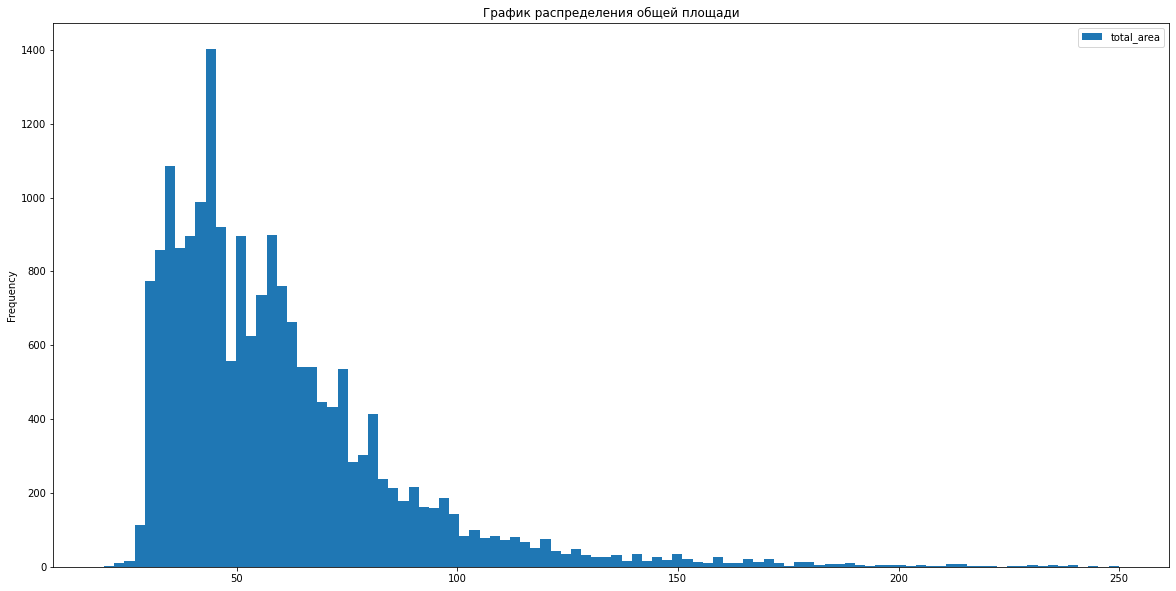

In [34]:
data.plot(y='total_area', kind='hist', bins=100, figsize=(20, 10)).set_title('График распределения общей площади');

Судя по графику, чаще всего встречаются квартиры с площадью до 100 м2, нежели до 200 м2. 

Посмотроим гистограмму в диапазоне от 0 до 200 м2.

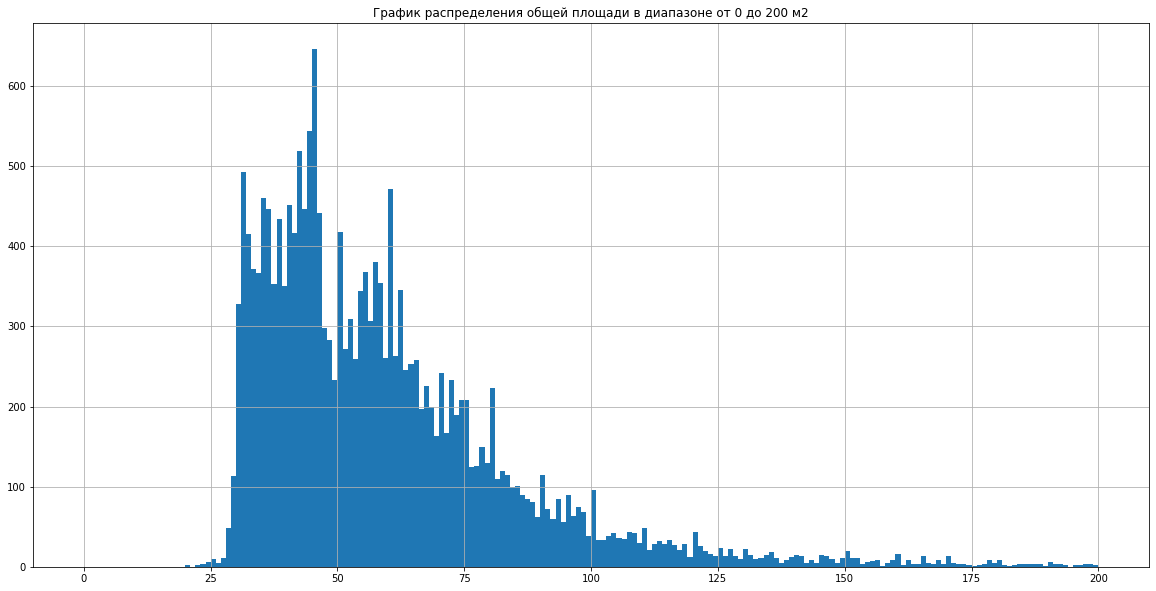

In [35]:
data['total_area'].hist(bins=200, figsize=(20, 10), range=(0,200)).set_title('График распределения общей площади в диапазоне от 0 до 200 м2');

Данная гистограмма более репрезентативна и показывает, что наибольшее количество квартир приходится на диапазон от 30 до 50 м2  и от 50 до 70 м2, наименьшее - с площадью до 30 м2 и площадями от 100 до 200 м2.

Проведем аналогичный анализ для жилой площади и площади кухни. 

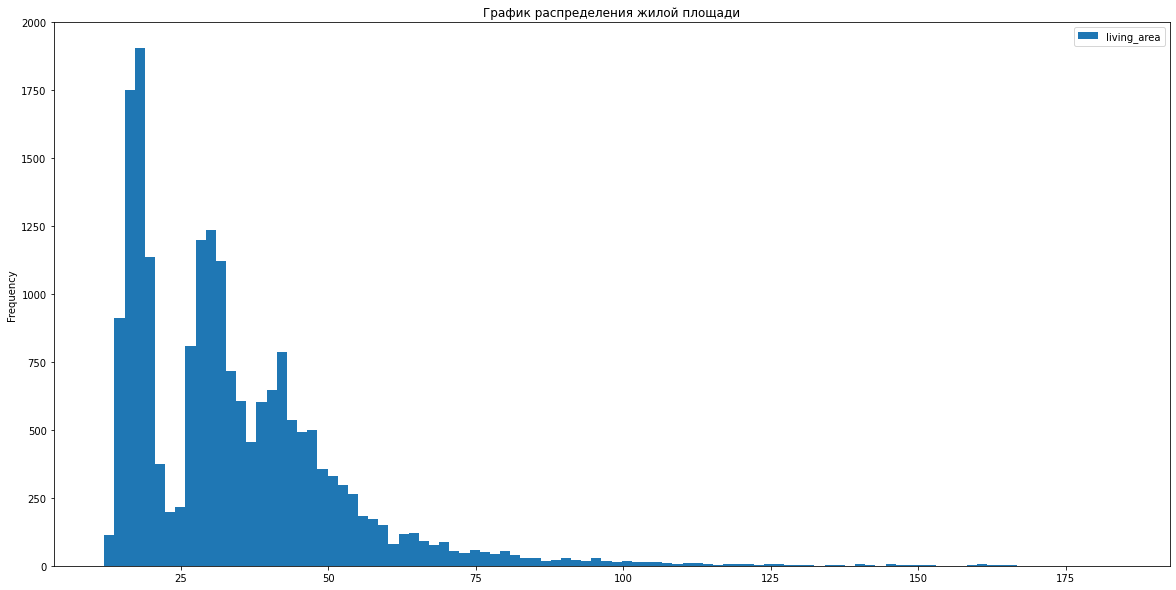

In [36]:
data.plot(y='living_area', kind='hist', bins=100, figsize=(20, 10)).set_title('График распределения жилой площади');

Как видно из графика, наибольшие значения по жилой площади приходятся на диапазон от 12 до 60 м2, наименьший - начиная от 60 м2. 
Как и в предыдущем примере, из-за масштаба данного графика, построим гистограмму в диапазоне от 0 до 200 м2.  

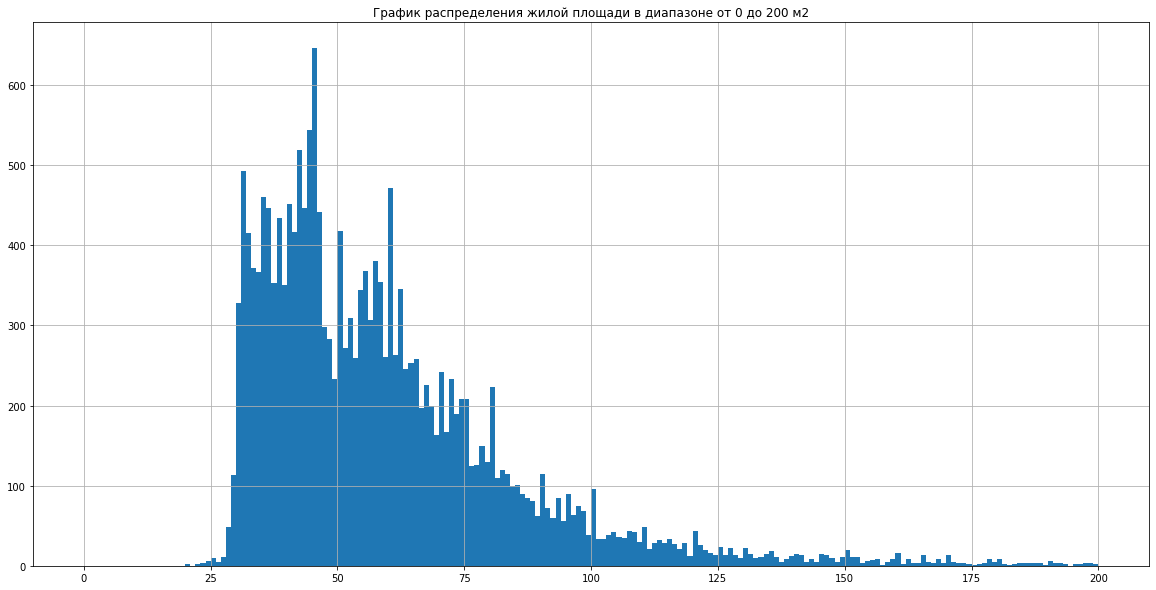

In [37]:
data['total_area'].hist(bins=200, figsize=(20, 10), range=(0,200)).set_title('График распределения жилой площади в диапазоне от 0 до 200 м2');

Как видно из графика, наибольшая жилая площадь приходится на диапазон от 30 до 45 м2 и от 50 до 60 м2, наименьшая - от 19 до 30 м2 и от 125 до 200 м2.  

Построим графики для площади кухни. 

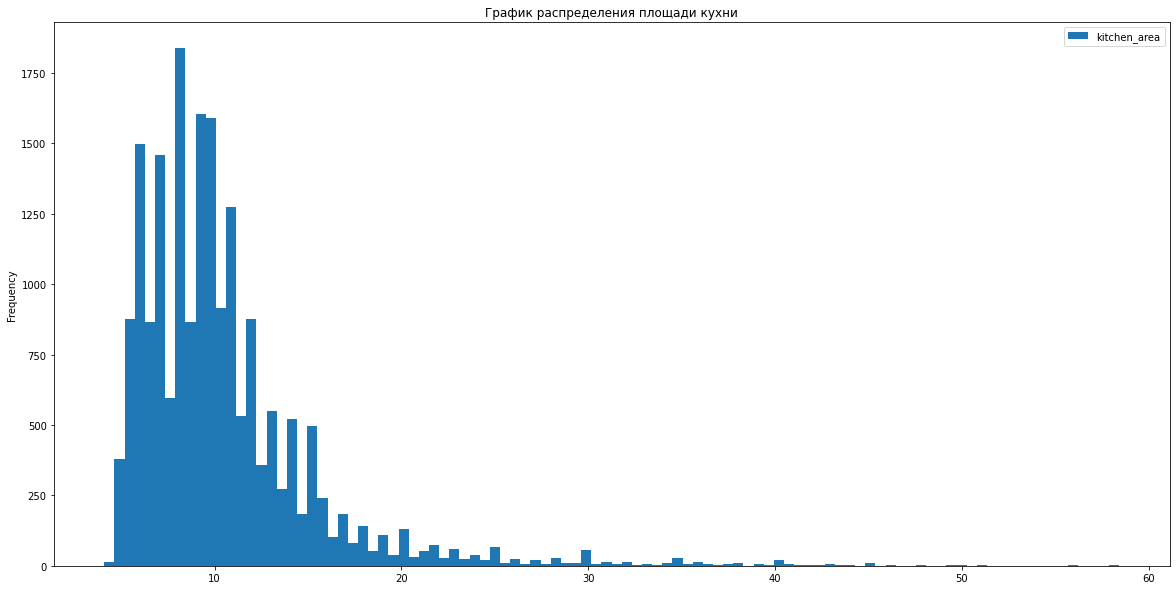

In [38]:
data.plot(y='kitchen_area', kind='hist', bins=100, figsize=(20, 10)).set_title('График распределения площади кухни');

Как видно и графика, наибольшая площадь кухни приходится на диапазон от 6 до 16 м2, наименьшая - начиная от 16 м2. 
Как и в случае с предыдущими двумя графиками, для детальности анализа построим гистограмму в диапазоне от 0 до 60 м2. 

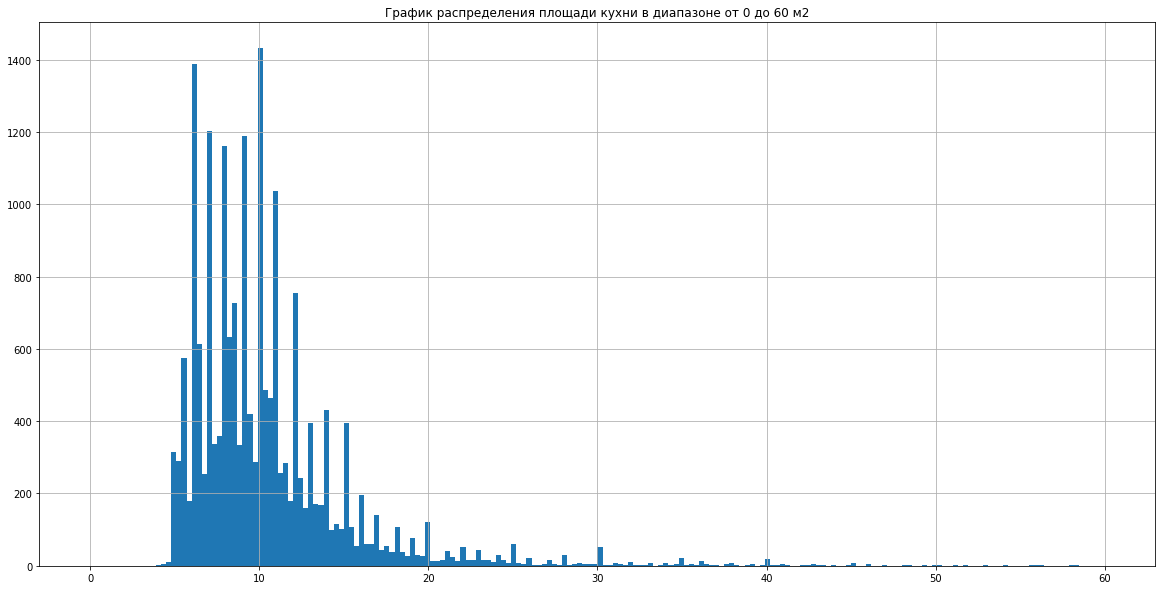

In [39]:
data['kitchen_area'].hist(bins=200, figsize=(20, 10), range=(0,60)).set_title('График распределения площади кухни в диапазоне от 0 до 60 м2');

Как видно из графика, максимальная площадь кухни 6 и 11 м2, однако наибольшее количество попадает в диапазон от 5 до 15 м2. Начиная от 20 м2 - количество объявлений значительно снижается. 

Изучим цену объекта. 

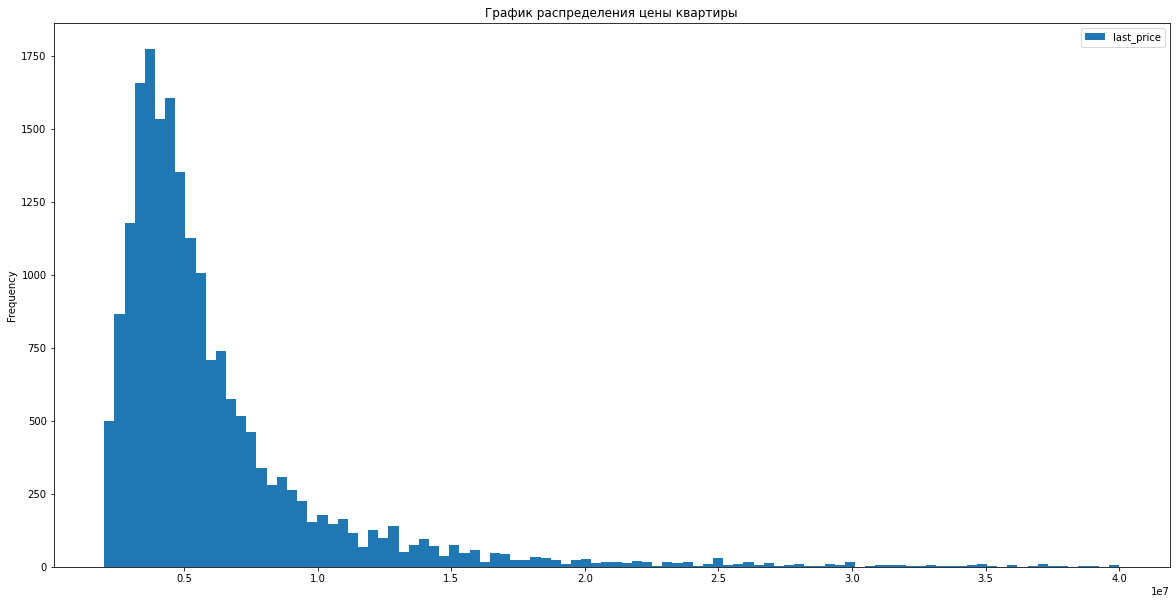

In [40]:
data.plot(y='last_price', kind='hist', bins=100, figsize=(20, 10)).set_title('График распределения цены квартиры');

Из-за очень большого выброса цен за объект недвижимости, данная гистограмма является не очень репрезентативной, однако, несмотря на это, можно отметить, что основная частота выборки приходится на диапазон примерно от 0 до 30000000 руб. 

Как и в предыдущих примерах с площадью, построим более детальную гистограмму, захватывающую диапазон от 0 до 30000000 руб.

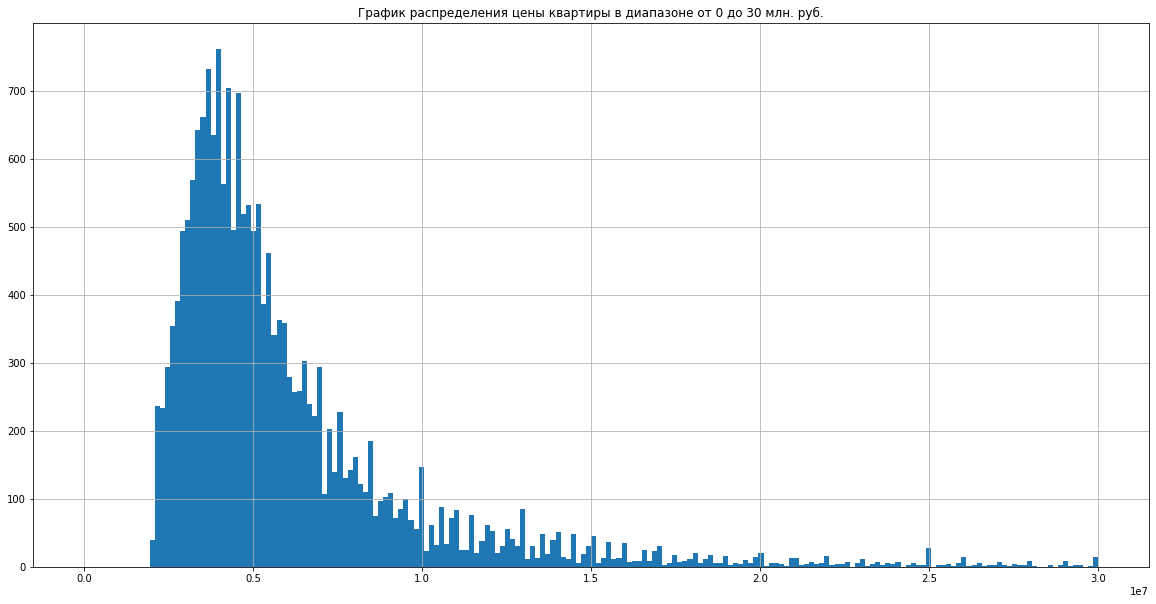

In [41]:
data['last_price'].hist(bins=200, figsize=(20, 10), range=(0,30000000)).set_title('График распределения цены квартиры в диапазоне от 0 до 30 млн. руб.');

<div class="alert alert-warning">
<b>⚠️ Комментарий ревьюера v1:</b> 
<br>Тут можно разделить все значения в столбце last_price на 1 млн, чтобы они пришли в более понятный вид)
</div>

Судя по графику, наибольшее количество квартир со стоимостью от 3,5 до 5 млн. рублей, наименьшее - со стоимостью свыше 10 млн. рублей. 

Далее изучим количество комнат. 

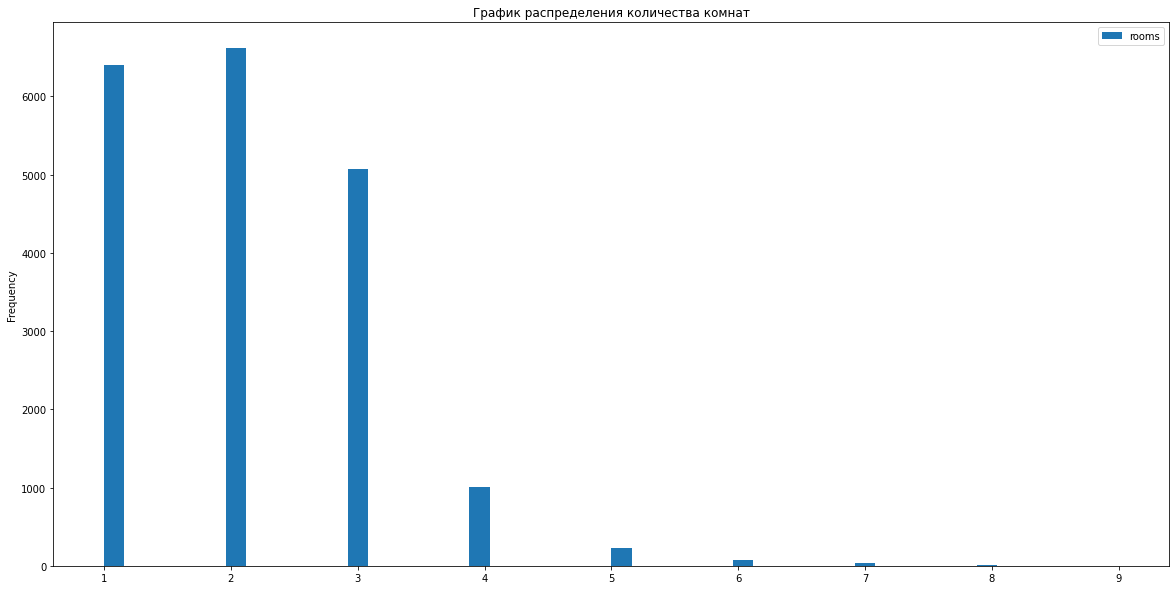

In [42]:
data.plot(y='rooms', kind='hist', bins=50, figsize=(20, 10)).set_title('График распределения количества комнат');

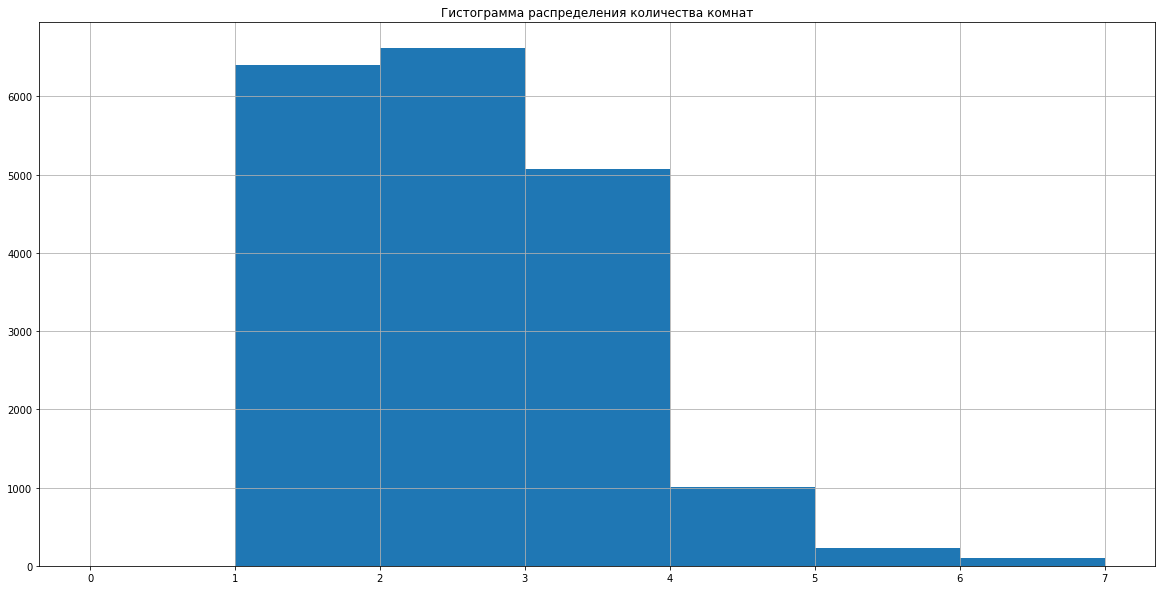

In [43]:
data['rooms'].hist(bins=7, figsize=(20, 10), range=(0,7)).set_title('Гистограмма распределения количества комнат');

Как видно из гистограммы 1, наибольшее количество квартир - с комнатами от 1 до 5. 

Кроме того, гистограмма 2 показывает, что в объявлениях лидируют двухкомнатные, однокомнатные и трехкомнатные квартиры, в то время как наименьший удельный вес приходится на квартиры с 5-7 комнатами. 

Изучим высоту потолков. 

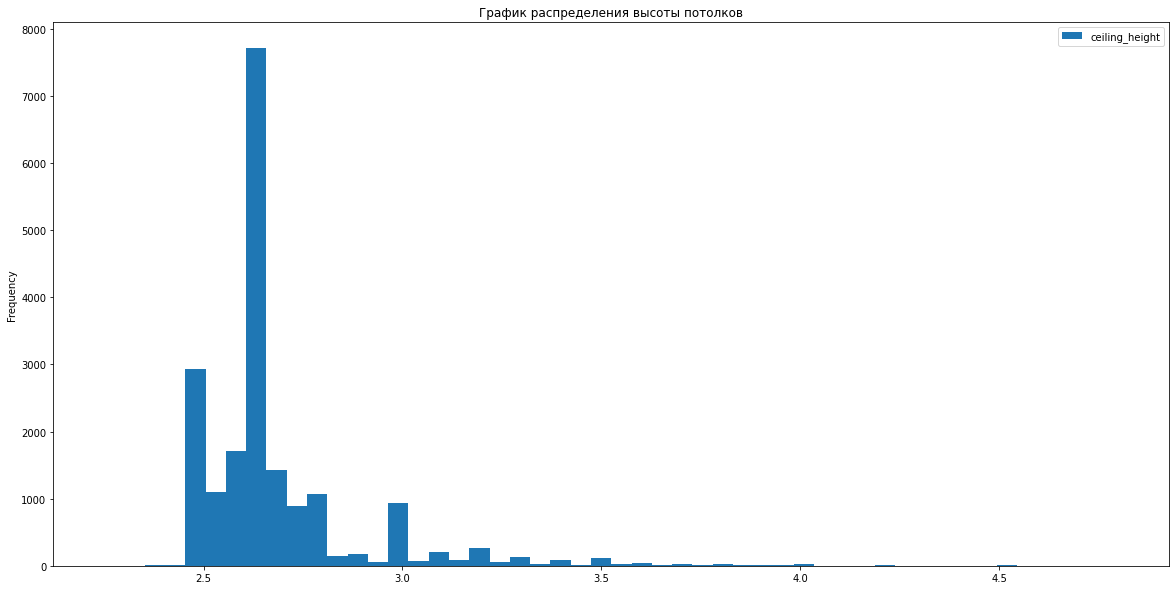

In [44]:
data.plot(y='ceiling_height', kind='hist', bins=50, figsize=(20, 10)).set_title('График распределения высоты потолков');

Как видно из графика, наибольший пик - высота потолка от 2,4 до 3 метров. Кроме того, не забываем, что в некоторых случаях аномальные значения менее 2 м и более 5 м (например, 100 м и 1 м потолки), а также пропуски были заменены медианными значениями, составившими 2,7 м, что соответствует строительным нормам. 


Изучим этаж квартиры.

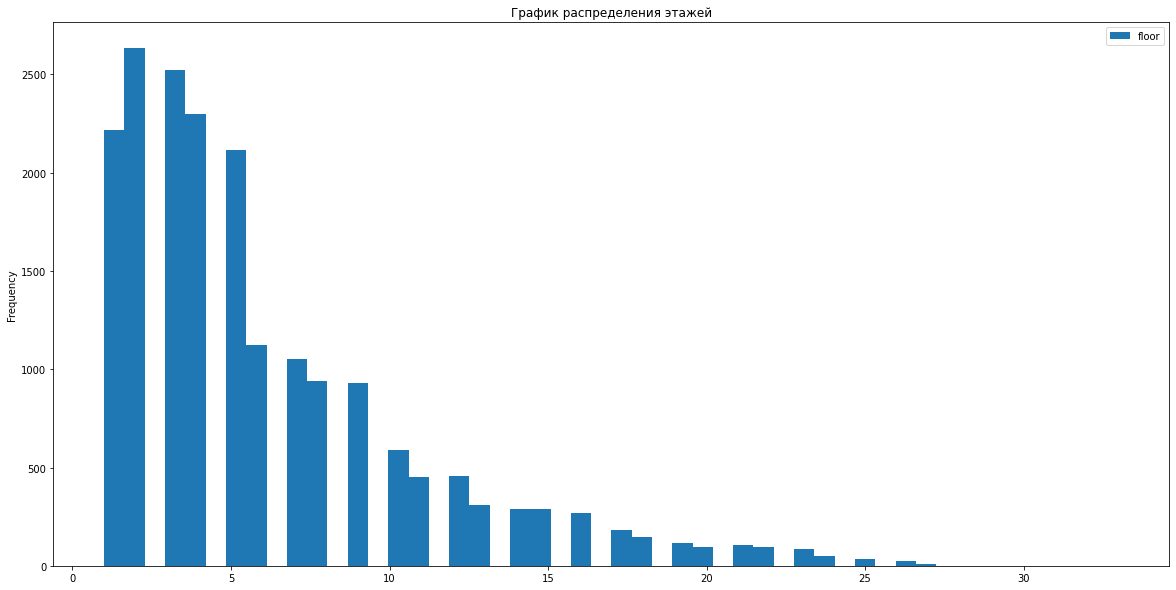

In [45]:
data.plot(y='floor', kind='hist', bins=50, figsize=(20, 10)).set_title('График распределения этажей');

Как видно из графика, наибольшее количество объявлений на Яндекс.Недвижимости - квартиры, расположенные на 1 - 6 этажах. Далее, начиная с 7 этажа, количество квартир значительно снижается и достигает минимума к 27 этажу. 

Изучим тип этажа объектов недвижимости. 

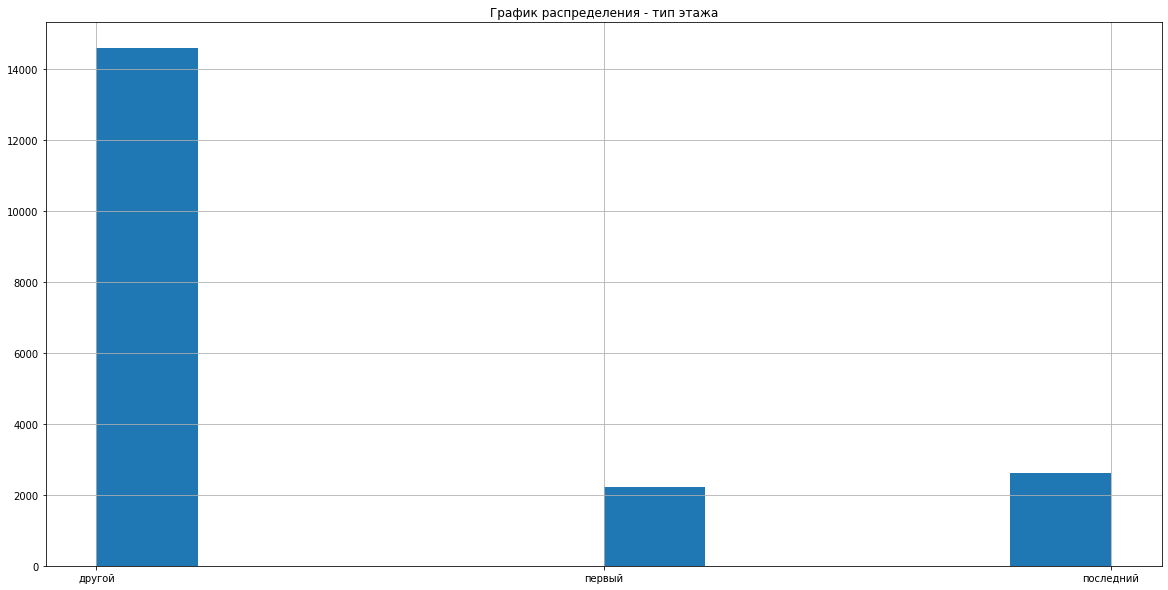

In [46]:
data['floor_category'].hist(bins=10, figsize=(20, 10)).set_title('График распределения - тип этажа');

Как видно из графика, наибольшее количество объявлений приходится на этажи, отличные от первого и последнего, а наименьшее - на первый этаж. 

Изучим общее количество этажей в доме. 

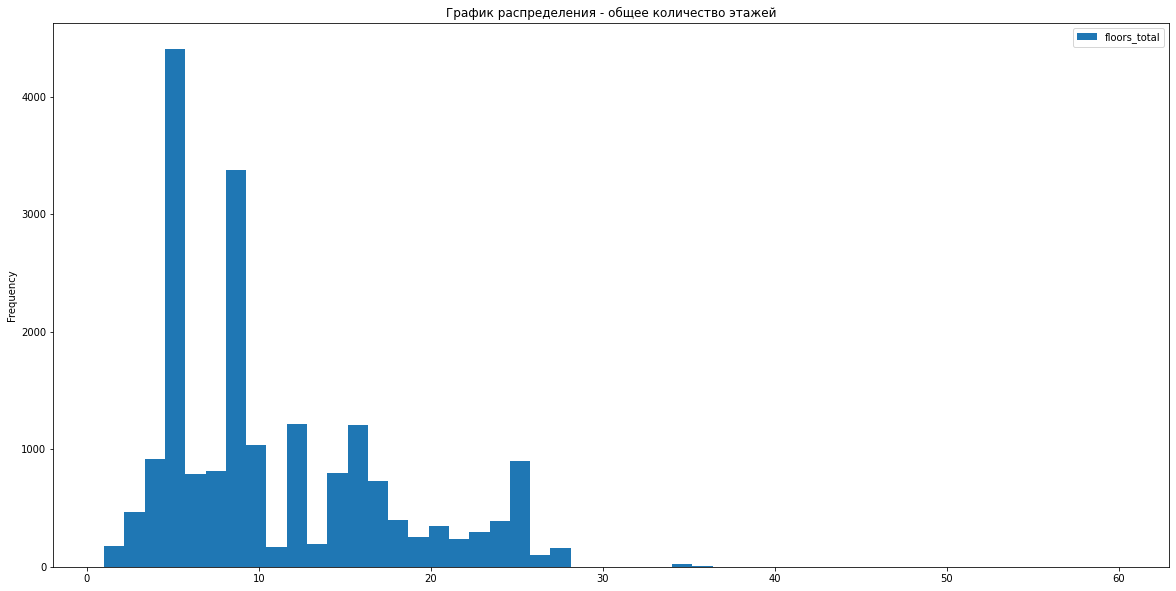

In [47]:
data.plot(y='floors_total', kind='hist', bins=50, figsize=(20, 10)).set_title('График распределения - общее количество этажей');

Как видно из графика, наибольшее количество объявлений в пятиэтажках, восьмиэтажках и девятиэтажках, далее - двенадцатиэтажки, пятнадцатиэтажки, а также четырехэтажки и двадцатипятиэтажки.

Изучим расстояние до центра города в метрах, расстояние до ближайшего аэропорта, расстояние до ближайшего парка. При анализе данных следует обратить внимание на то, что эти данные добавлялись зачительно позже, вручную и было очень много пропущенных значений, которые для целей анализа не изменялись.


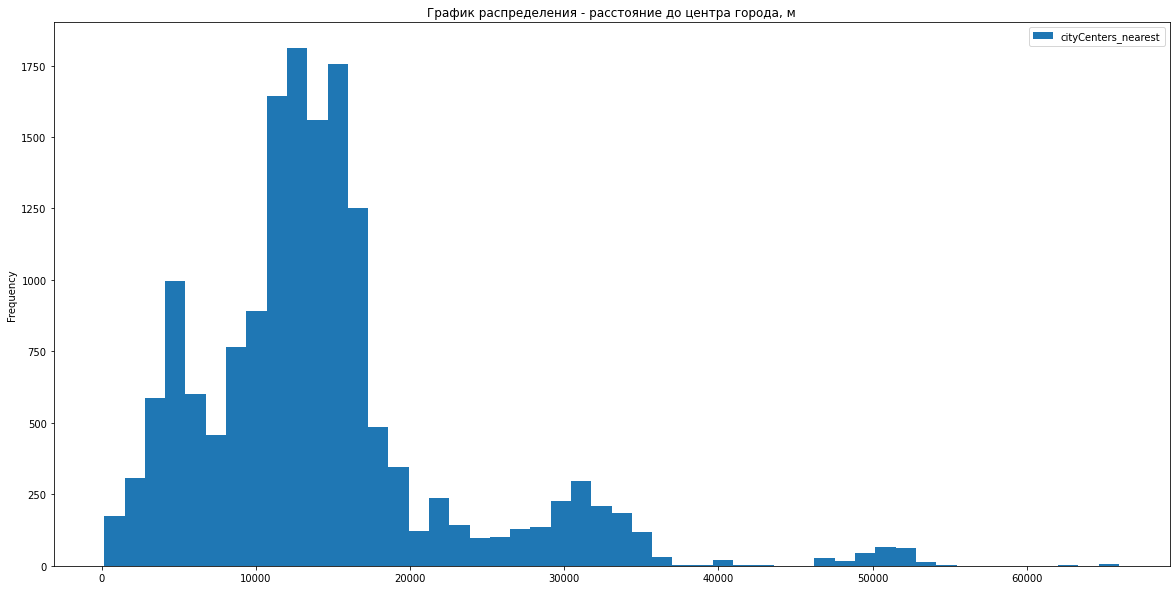

In [48]:
#гистограмма "Расстояние до центра города в метрах"
data.plot(y='cityCenters_nearest', kind='hist', bins=50, figsize=(20, 10)).set_title('График распределения - расстояние до центра города, м');

Как видно из графика, наибольшее количество объявлений приходится на диапазон от 8 до 19 км и 3 до 6 км от центра города.

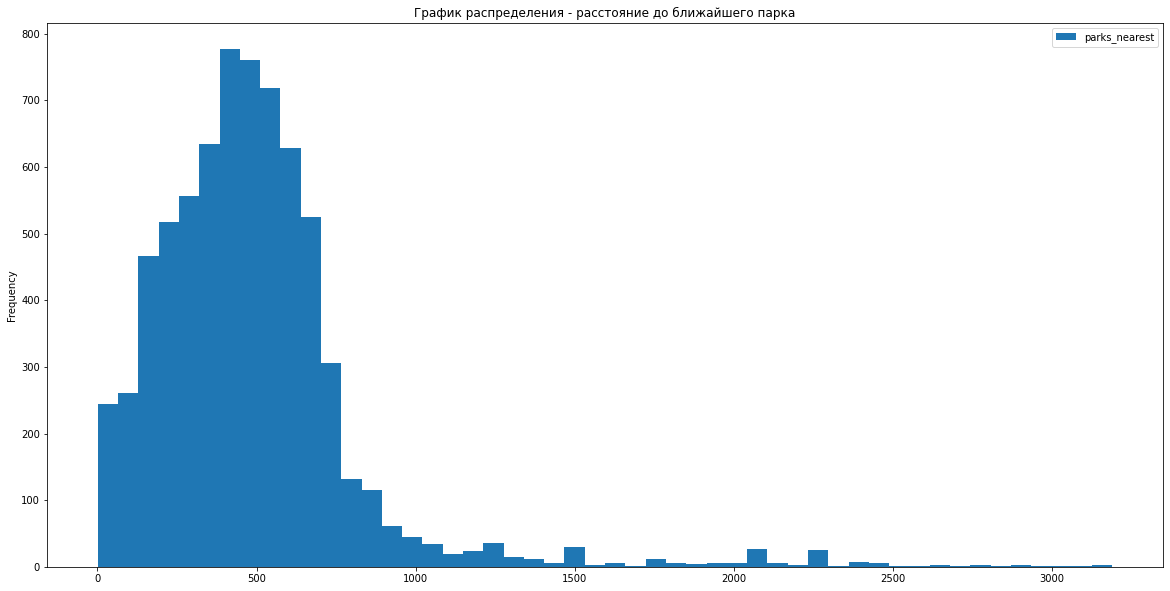

In [49]:
#гистограмма "Расстояние до ближайшего парка"
data.plot(y='parks_nearest', kind='hist', bins=50, figsize=(20, 10)).set_title('График распределения - расстояние до ближайшего парка');

Как видно из графика, пик объявлений приходится на расстояние от 40 до 700 метров до ближайшего парка.

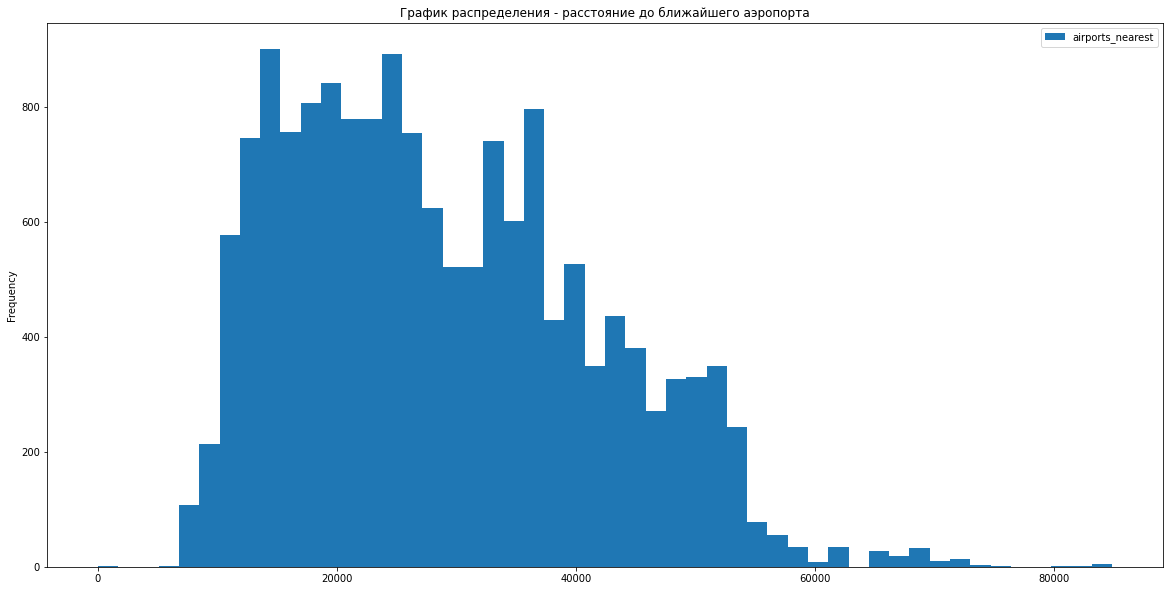

In [50]:
#гистограмма "Расстояние до ближайшего аэропорта"
data.plot(y='airports_nearest', kind='hist', bins=50, figsize=(20, 10)).set_title('График распределения - расстояние до ближайшего аэропорта');

Как видно из графика, пик объявлений приходится на расстояние от 18 до 40 км до ближайшего аэропорта. 

Изучим день и месяц публикации объявления. 

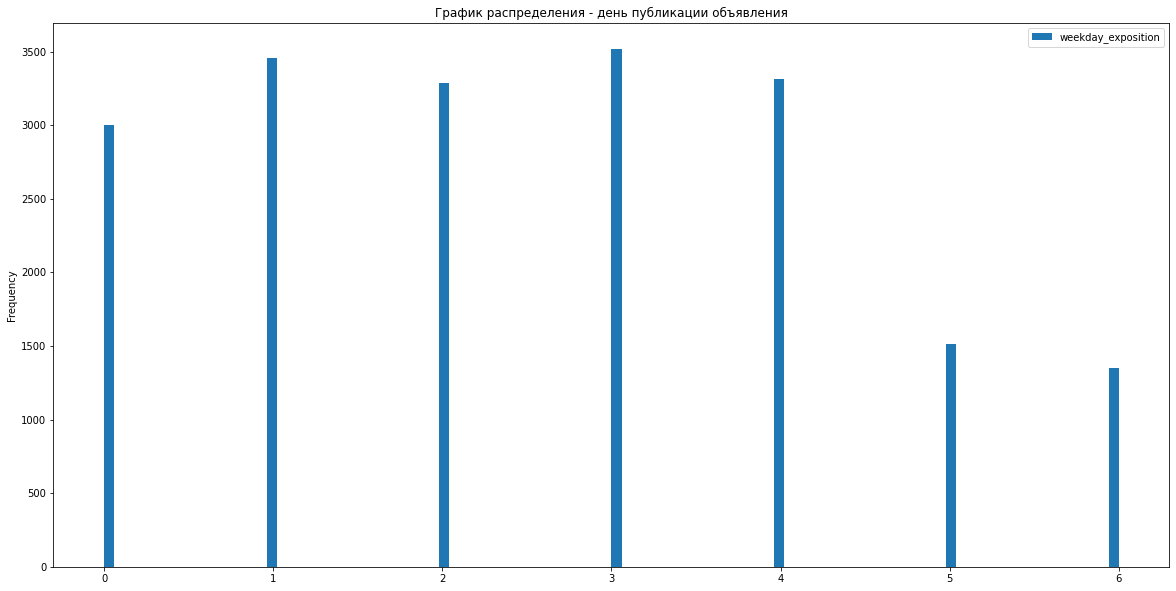

In [51]:
data.plot(y='weekday_exposition', kind='hist', bins=100, figsize=(20, 10)).set_title('График распределения - день публикации объявления');

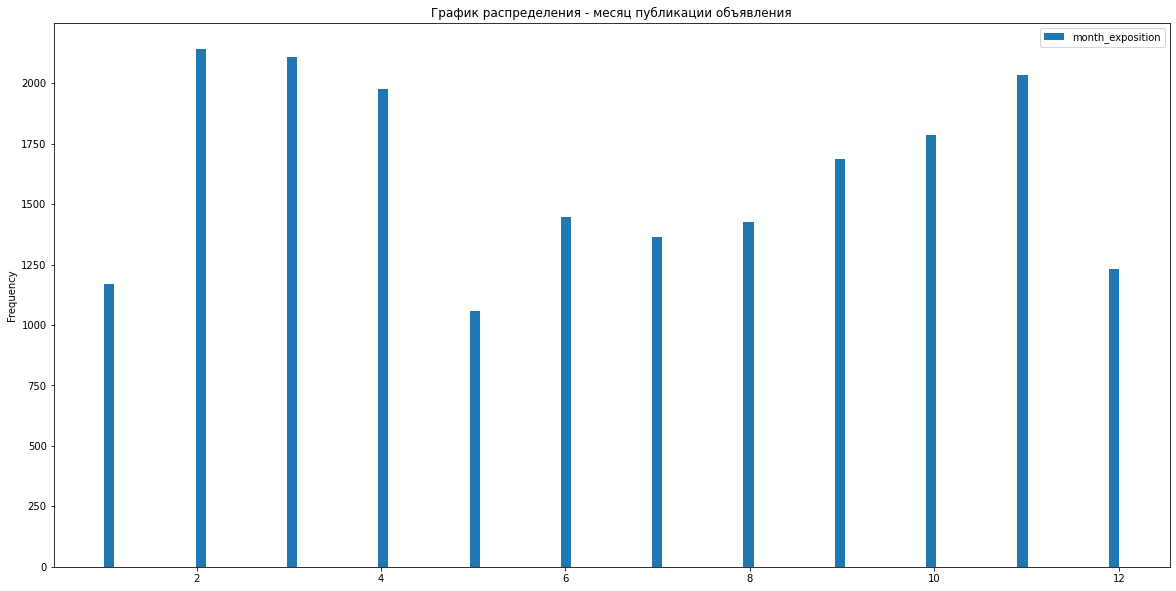

In [52]:
data.plot(y='month_exposition', kind='hist', bins=100, figsize=(20, 10)).set_title('График распределения - месяц публикации объявления');

Как видно из графиков, наибольшее количество объявлений было размещено по вторникам, четвергам, пятницам и средам, наименьшее - по воскреcеньям. 
Относительно месяца размещения объявления: наибольшее количество объявлений размещено с февраля по апрель и с сентября по ноябрь. В январе, мае и декабре - наименьшее размещение объявлений. 


Изучим, как быстро продавались квартиры путем выполнения следующих шагов:

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Ты корректно подбираешь основные диапазоны, а также верно читаешь графики! 
</div>

<div class="alert alert-warning">
<b>⚠️ Комментарий ревьюера v1:</b> 
<br>Для того чтобы подписать график мы можем использовать метод plt.title() и в конце кода применить plt.show(). По ссылкам ниже можно почитать подробнее как добавить название для графика или подписать его оси
    
    https://pyprog.pro/mpl/mpl_title.html
    https://pyprog.pro/mpl/mpl_axis_signatures.html 
</div>

<div class="alert alert-info">
<b>Комментарий Екатерины Тиньковой:</b>
Большое спасибо за ссылки - графики подписала. Но у меня возникла ошибка с подписью осей - поэтому оставила все как есть. Приведи, пожалуйста, пример, как я могу подписать графики, чтобы не возникало ошибки. <br>
</div> 

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v2:</b> 
<br>Оставляю код ниже)
</div>

Text(0, 0.5, 'Количества объявлений')

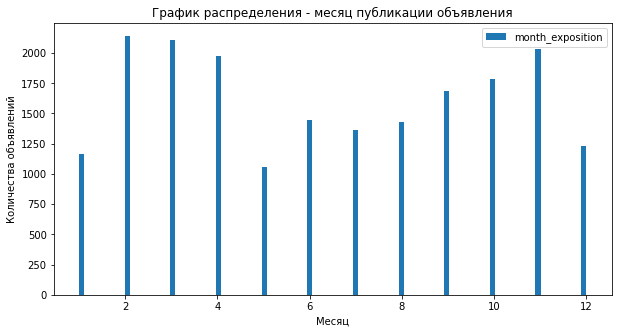

In [85]:
data.plot(y='month_exposition', kind='hist', bins=100, figsize=(10, 5)).set_title('График распределения - месяц публикации объявления');
plt.xlabel("Месяц")
plt.ylabel("Количества объявлений")

1) построим диаграмму размаха: 

(1.0, 1000.0)

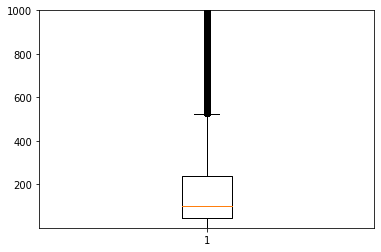

In [53]:
#импортируем библиотеку matplotlib.pyplot и сохраним ее в качестве переменной plt
import matplotlib.pyplot as plt
plt.boxplot(data[data['days_exposition']!=0]['days_exposition'])
plt.ylim(1,1000)

<AxesSubplot:ylabel='Frequency'>

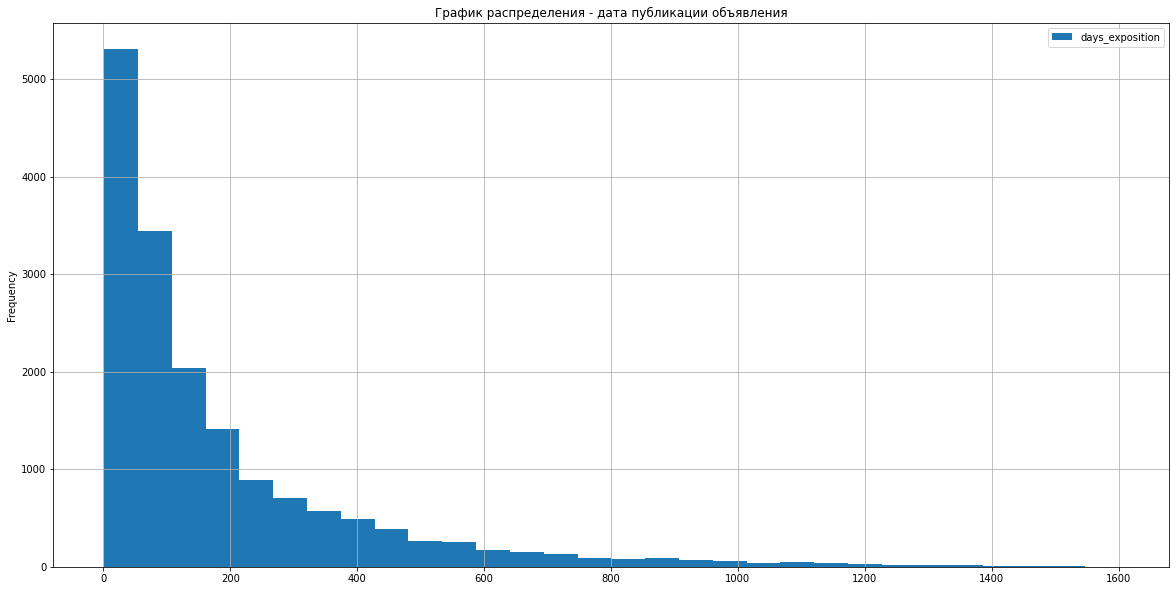

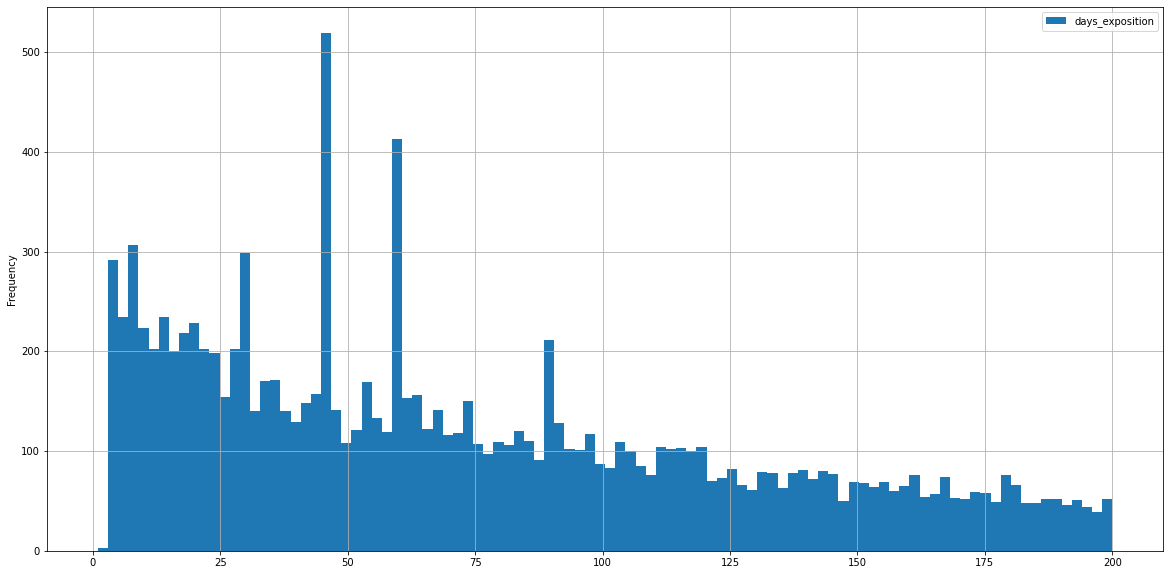

In [54]:
data.plot(y='days_exposition', kind='hist',bins=30,grid=True,range=(1,1600), figsize=(20, 10)).set_title('График распределения - дата публикации объявления');
data.plot(y='days_exposition', kind='hist',bins=100,grid=True,range=(1,200), figsize=(20, 10))

2) посчитаем среднее и медиану с помощью методов mean() и median():

In [55]:
data['days_exposition'].mean()

159.7432717542325

In [56]:
data['days_exposition'].median()

78.0

Из графиков видно, что медиана тяготеет к низким значениям и составляет 78, т.е. в  основном квартиры продаются за 2,5 месяца. Среднее значение в 2 раза выше медианы, что говорит о сильном влиянии выбросов. Верхний ус межквартильного размаха ограничен значением примерно в 500 дней, следовательно, квартиры за этой отметкой можно назвать продающимися необычайно долго. Нижний ус межквартильного размаха упирается в минимальное значение - в 0. Учитывая пик на гистограмме есть не менее 3000 квартир, длительность продажи которых составила 0 дней, т.е. проданы в день публикации объявления. Можно сказать, что эти квартиры были проданы очень быстро.

Изучим зависимость цены на квартиру от общей площади, жилой площади и площади кухни. Для этого воспользуемся сводными таблицами (вызов метода pivot_table()). Построим диаграмму распределения с помощью метода plot(). 

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>А как бы ты объяснила эти пики?
</div>

<div class="alert alert-danger">
<b>❌ Комментарий ревьюера v2:</b> 
<br>По заданию, в разделе ниже,  необходимо изучить общую стоимость квартиры, а не стоимость за квадратный метр
</div>

<div class="alert alert-info">
<b>Комментарий Екатерины Тиньковой:</b>
Спасибо за комментарий! Исправила. В 4 пункте рекомендаций по выполнению было написано про цены за квадратный метр, поэтому в данном случае меня подвела невнимательность. В 3 пункте действительно написано про общую (полную) стоимость. <br>
</div> 

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v2:</b>
<br>Правка выполнена 👍
</div>

0.7846160464170697

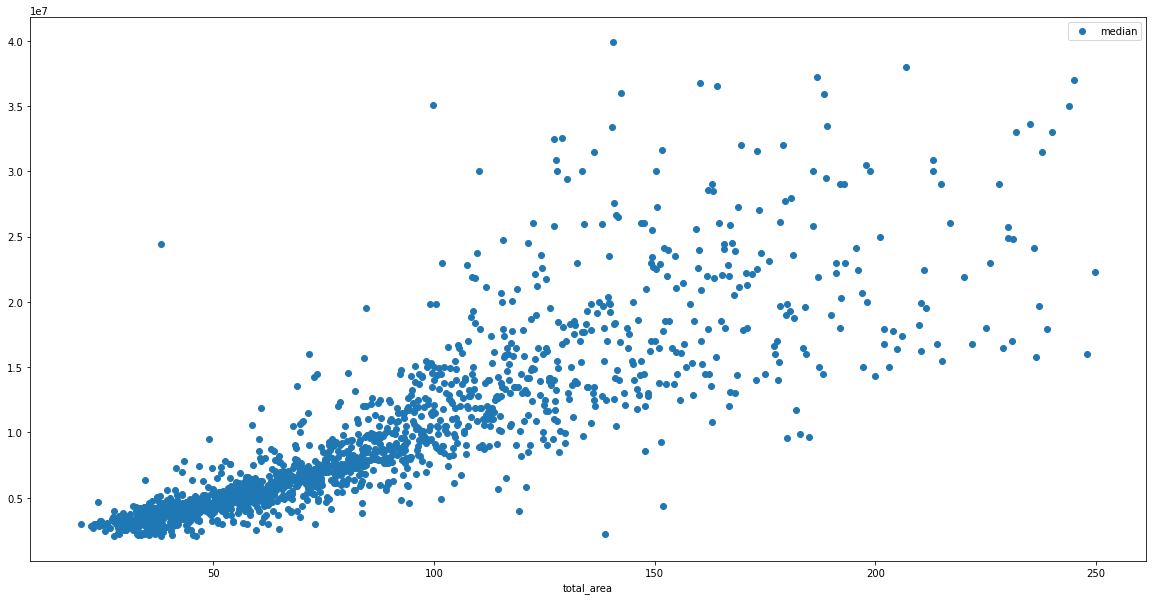

In [57]:
pivot_table_total_area = data.pivot_table(index='total_area', values='last_price', aggfunc=['mean', 'count', 'median'])
pivot_table_total_area.columns=['mean', 'count', 'median']
pivot_table_total_area.plot(y='median', style='o', figsize=(20, 10))
pivot_table_total_area.sort_values('median', ascending=False)
data['total_area'].corr(data['last_price'])

0.6788054602032874

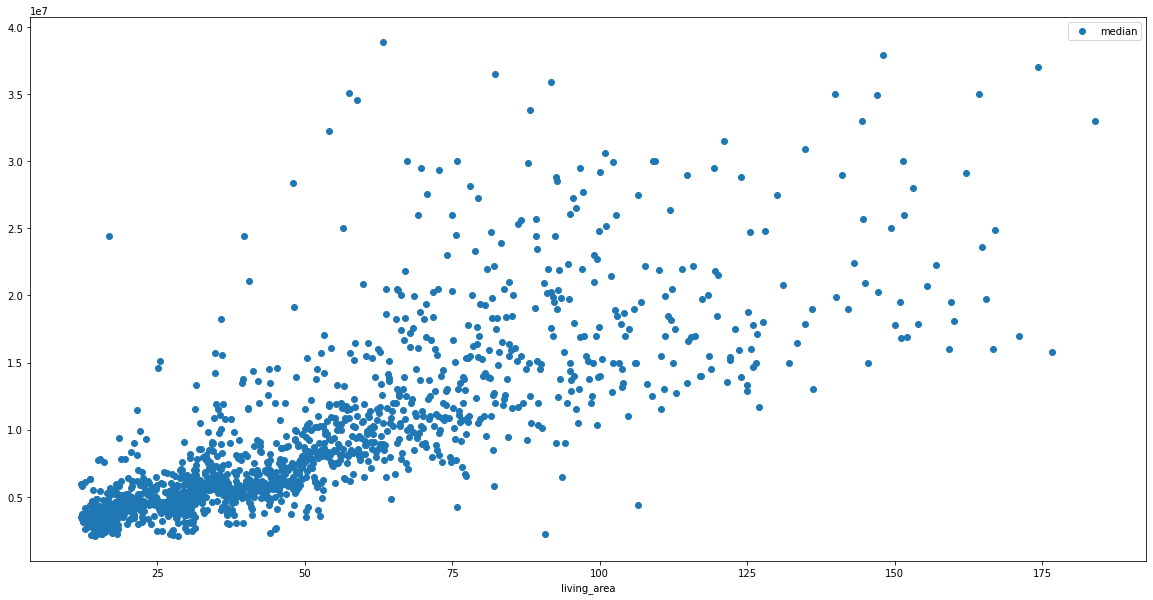

In [58]:
pivot_table_living_area = data.pivot_table(index='living_area', values='last_price', aggfunc=['mean', 'count', 'median'])
pivot_table_living_area.columns=['mean', 'count', 'median']
pivot_table_living_area.plot(y='median', style='o', figsize=(20, 10))
pivot_table_living_area.sort_values('median', ascending=False)
data['living_area'].corr(data['last_price'])

0.5921901956224529

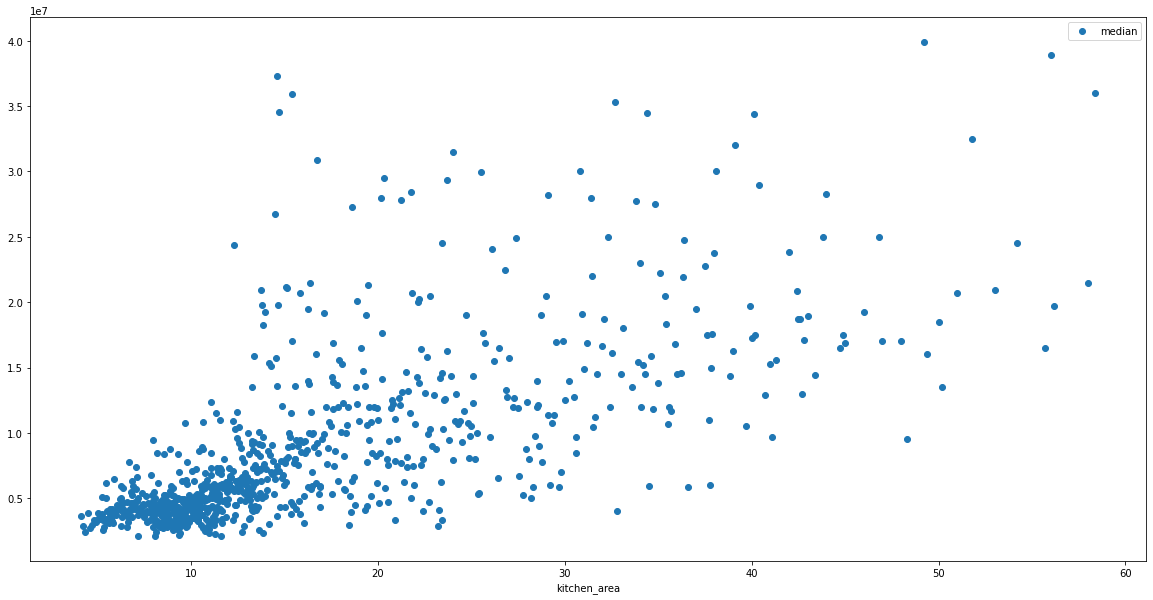

In [59]:
pivot_table_kitchen_area = data.pivot_table(index='kitchen_area', values='last_price', aggfunc=['mean', 'count', 'median'])
pivot_table_kitchen_area.columns=['mean', 'count', 'median']
pivot_table_kitchen_area.plot(y='median', style='o', figsize=(20, 10))
pivot_table_kitchen_area.sort_values('median', ascending=False)
data['kitchen_area'].corr(data['last_price'])

Как видно из всех трех диаграмм рассеяния, зависимость цены квадратного метра от общей и жилой площади, площади кухни - очень слабая, коэффициент корреляции Пирсона составляет 0,3, что означает что чем выше площадь квартиры, тем немного выше ее стоимость. 

Изучим зависимость цены квартиры от числа комнат. 

0.5058953115095397

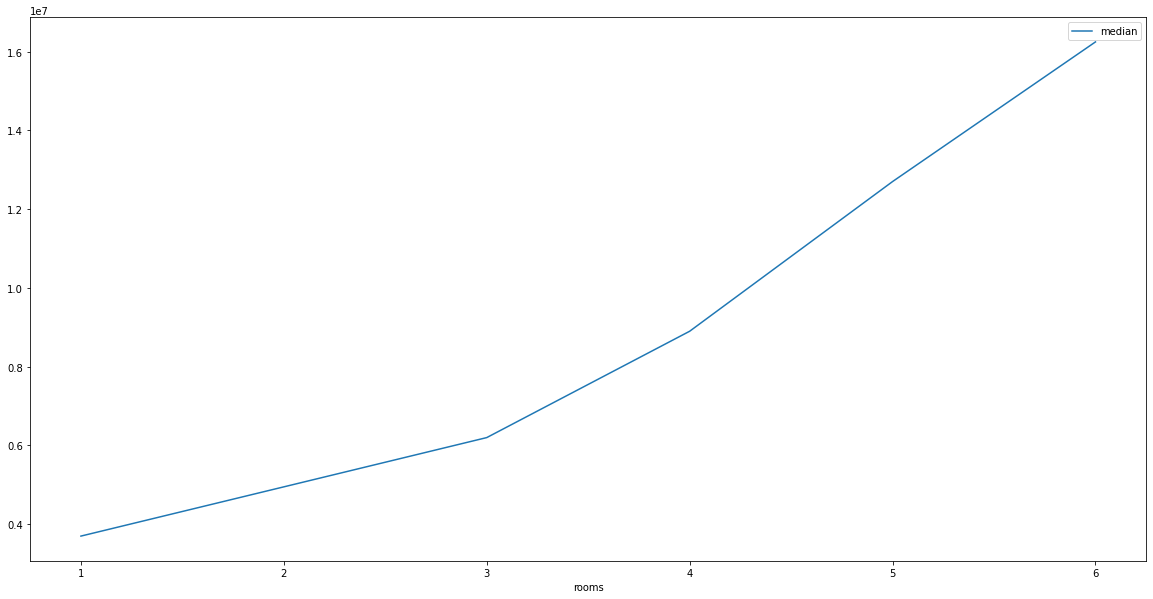

In [60]:
pivot_table_rooms=data.pivot_table(index='rooms', values='last_price', aggfunc=['mean', 'count', 'median'])
pivot_table_rooms.columns=['mean', 'count', 'median']
pivot_table_rooms.query('count>50').plot(y='median', figsize=(20, 10))
pivot_table_rooms.query('count>50').sort_values('median', ascending=False)
data['rooms'].corr(data['last_price'])

Из графика видно, что существует сильная связь между количеством комнат в квартире и стоимостью квартиры. Так, наибольшая стоимость у пяти- и шестикомнатных квартир, в то время, как наименьшая стоимость квадратного метра у квартир с 1 - 3 комнатами. 


Изучим зависимость цены квартиры от этажа (первого, последнего, другой). 

,mean,count,median
floor_category,,,
другой,6.300198e+06,14591,4970000.0
первый,5.012622e+06,2215,4200000.0
последний,6.248837e+06,2627,4640000.0


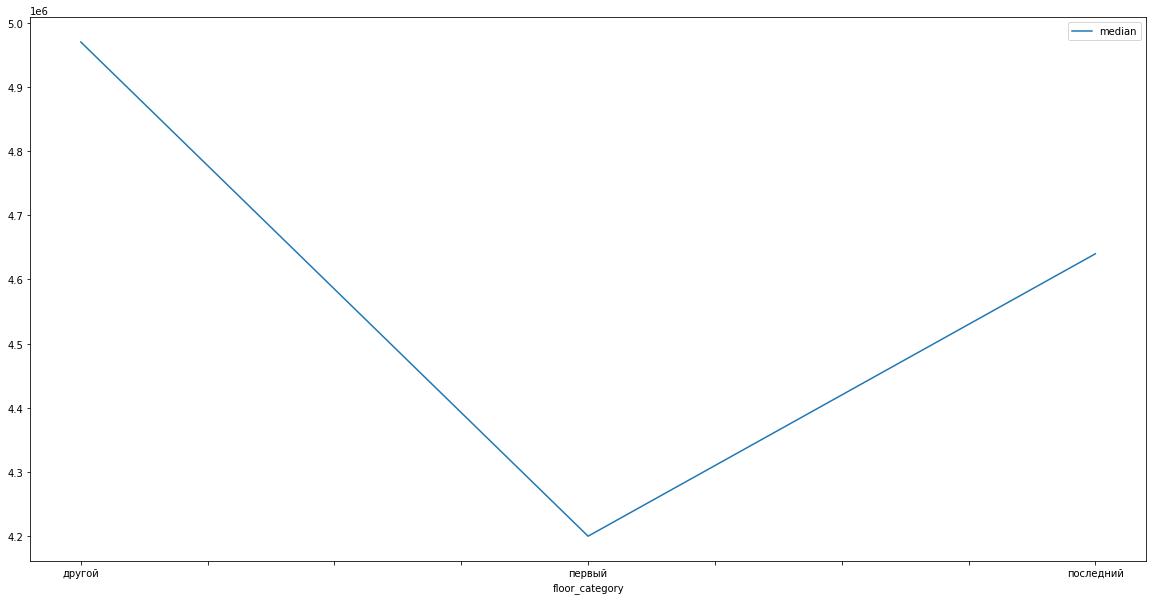

In [61]:
pivot_table_floor_category = data.pivot_table(index='floor_category', values='last_price', aggfunc=['mean', 'count', 'median'])
pivot_table_floor_category.columns = ['mean', 'count', 'median']
pivot_table_floor_category.plot(y='median', figsize=(20, 10))
pivot_table_floor_category

<div class="alert alert-warning">
<b>⚠️ Комментарий ревьюера v1:</b> 
<br>Тут больше для визуализации подойдет barplot, а не линейный график
</div>

<div class="alert alert-info">
<b>Комментарий Екатерины Тиньковой:</b>
У меня возникают проблемы с вызовом библиотеки seaborn - возникает ошибка. Я не понимаю, в чем дело, может системный сбой. Поэтому я оставила как есть. <br>
</div> 

<div class="alert alert-warning">
<b>⚠️ Комментарий ревьюера v2:</b> 
<br>Можно и без seaborn'a)
</div>

In [ ]:
#код ревьюера
data.pivot_table(index='floor_category', values='last_price', aggfunc=['mean', 'count', 'median']).plot.bar()

Из графика видно, что наибольшая стоимость у квартир с этажностью, отличной от первого и последнего этажа. Наименьшая стоимость квадратного метра у квартир, находящихся на первом этаже. 

Изучим зависимость стоимости квартиры от даты размещения объявления - дня недели, месяца и года. 

,mean,count,median
weekday_exposition,,,
1,6.067050e+06,3455,4900000.0
2,6.196573e+06,3287,4900000.0
3,6.360182e+06,3517,4885000.0
0,6.196018e+06,3000,4850000.0
5,5.983036e+06,1512,4750000.0
4,6.018878e+06,3312,4722500.0
6,6.057300e+06,1350,4710000.0


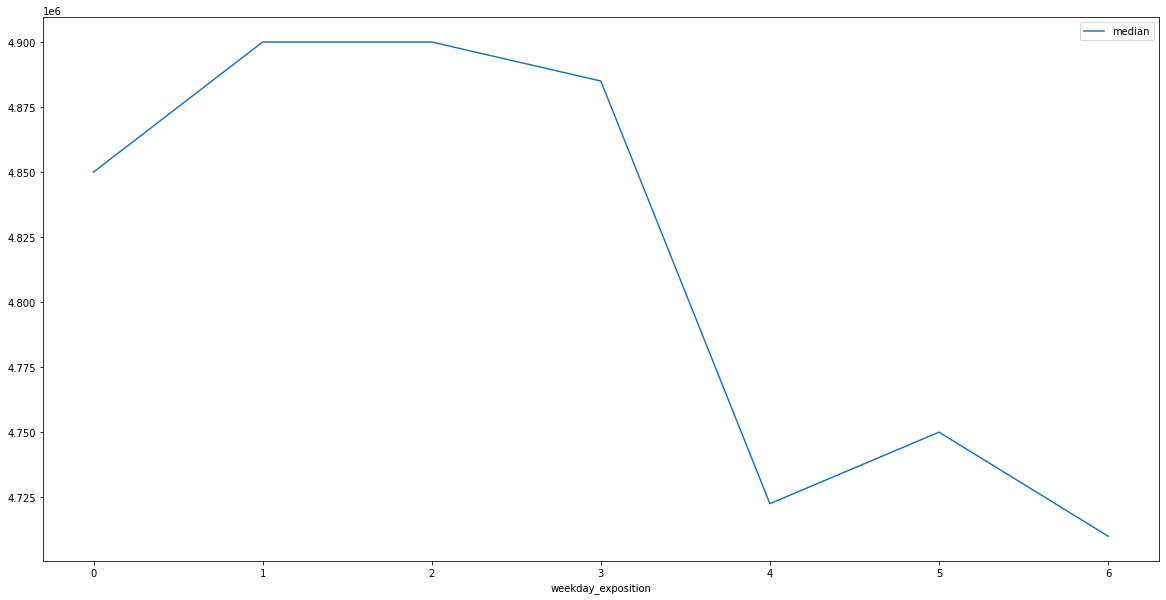

In [62]:
pivot_table_weekday_exposition = data.pivot_table(index='weekday_exposition', values='last_price', aggfunc=['mean', 'count', 'median'])
pivot_table_weekday_exposition.columns = ['mean', 'count', 'median']
pivot_table_weekday_exposition.plot(y='median', figsize=(20, 10))
pivot_table_weekday_exposition.sort_values('median', ascending=False)

Из графика видно, что цена квартиры зависит от дня недели размещения объявления о продаже. Так, объявления, размещенные во вторник, среду и четверг - самые дорогие по стоимости квартир, а размещенные в пятницу и воскресенье - самые дешевые. Отсюда следует вывод о том, что наибольшая активность у людей, размещающих объявления, именно в рабочие дни, в связи с этим и стоимость квадратного метра в таких объявлениях намного выше, чем в объявления, размещенных в выходные дни. 

,mean,count,median
month_exposition,,,
4,6.110406e+06,1978,4990000.0
12,6.305944e+06,1233,4990000.0
1,6.280416e+06,1168,4875000.0
2,6.134088e+06,2141,4850000.0
3,6.128270e+06,2108,4850000.0
9,6.191787e+06,1688,4850000.0
11,6.225543e+06,2033,4850000.0
8,6.177011e+06,1427,4838050.0
7,6.069203e+06,1365,4800000.0


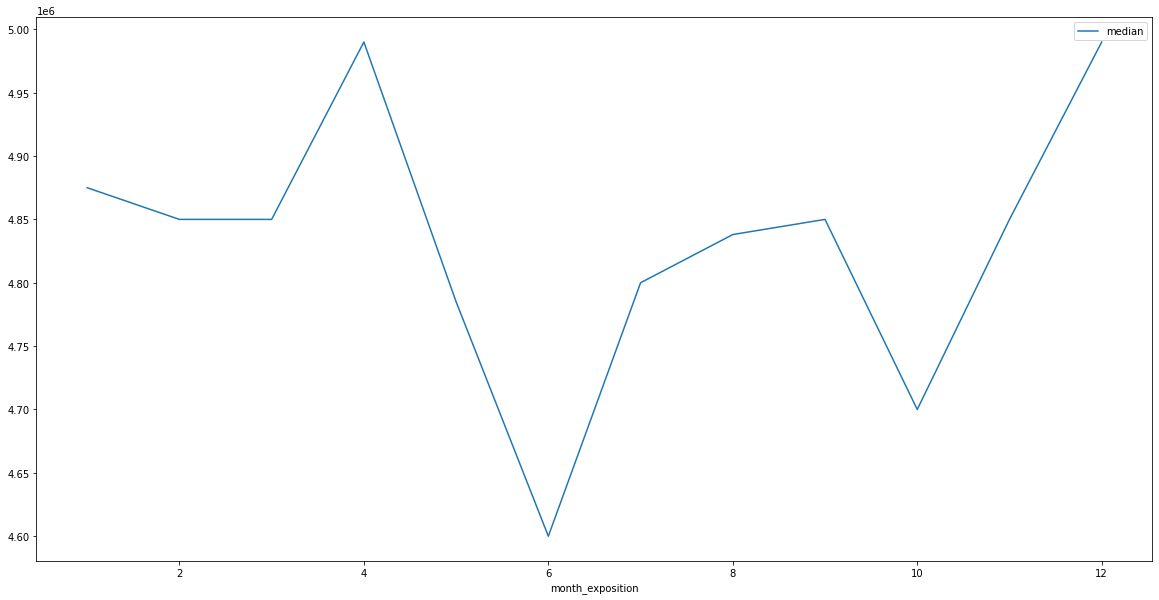

In [63]:
pivot_table_month_exposition = data.pivot_table(index='month_exposition', values='last_price', aggfunc=['mean', 'count', 'median'])
pivot_table_month_exposition.columns = ['mean', 'count', 'median']
pivot_table_month_exposition.plot(y='median', figsize=(20, 10))
pivot_table_month_exposition.sort_values('median', ascending=False)

Из графика видно, что самая высокая цена за квартиру приходится на апрель, декабрь и август, а самая низкая - в июне и октябре. Кроме того, волнообразность графика говорит об определенных колебаниях, означающих присутствие сезонности на рынке недвижимости - в конце весны-начале лета и в октябре размещено наименьшее количество объявлений и стоимость квартиры в объявлениях, размещенных в этом промежутке времени, так же является наименьшей по сравнению с другими месяцами года. 

,mean,count,median
year_exposition,,,
2014,1.009623e+07,118,7540000.0
2015,7.075914e+06,993,5350000.0
2019,6.429122e+06,2387,5200000.0
2018,5.973869e+06,6720,4800000.0
2016,6.154002e+06,2354,4750000.0
2017,6.012223e+06,6861,4650000.0


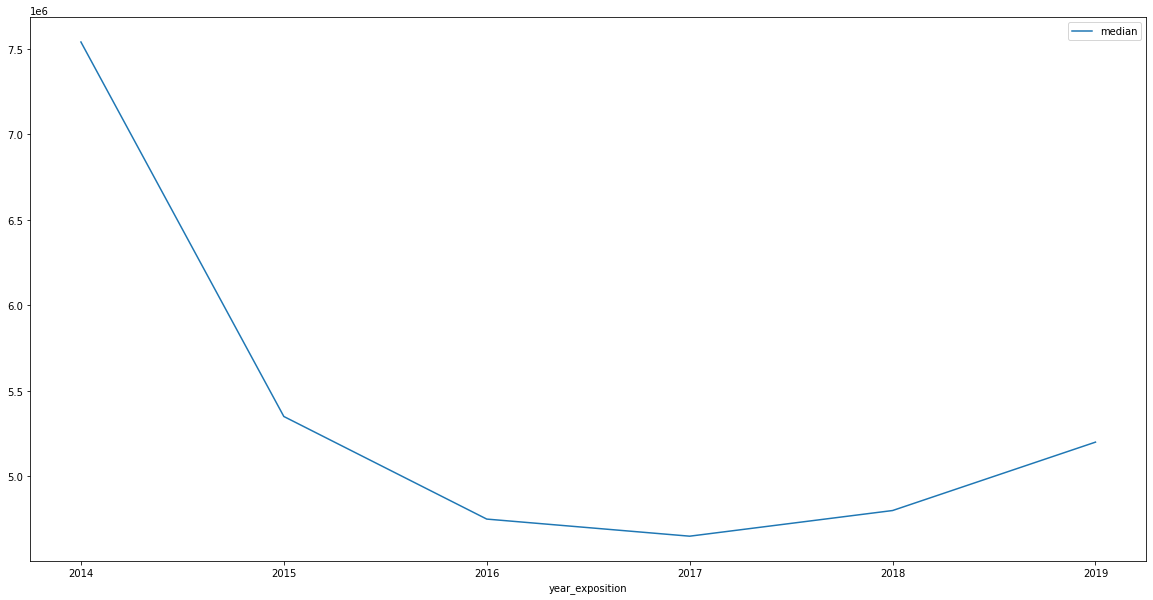

In [64]:
pivot_table_year_exposition = data.pivot_table(index='year_exposition', values='last_price', aggfunc=['mean', 'count', 'median'])
pivot_table_year_exposition.columns = ['mean', 'count', 'median']
pivot_table_year_exposition.plot(y='median', figsize=(20, 10))
pivot_table_year_exposition.sort_values('median', ascending=False)

Из графика видно, что начиная с 2014 года начался спад на рынке недвижимости. В 2016-2018 гг. была наименьшая стоимость за квадратный метр, однако, начиная с 2018 года начался подъем цен и в 2019 году уровень цен достиг уровня середины 2015 года. 

Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений и выделим населённые пункты с самой высокой и низкой стоимостью квадратного метра. 

In [65]:
locality_pivot_table = data.pivot_table(index='locality_name', values='price_per_sqmeter', aggfunc=['count', 'mean'])
locality_pivot_table.columns = ['count', 'mean']
locality_pivot_table = locality_pivot_table.sort_values('count', ascending=False).head(10)
locality_pivot_table

,count,mean
locality_name,,
Санкт-Петербург,13742,110731.176175
поселок Мурино,416,85162.377404
поселок Шушары,381,78135.703412
Всеволожск,341,69783.387097
Пушкин,329,103145.516717
Колпино,321,75129.417445
поселок Парголово,276,90646.887681
Гатчина,271,70213.627306
деревня Кудрово,221,92278.624434




Определим самую высокую стоимость. 

In [66]:
locality_pivot_table[locality_pivot_table['mean'] == locality_pivot_table['mean'].max()]

,count,mean
locality_name,,
Санкт-Петербург,13742,110731.176175


Определим самую низкую стоимость.

In [67]:
locality_pivot_table[locality_pivot_table['mean'] == locality_pivot_table['mean'].min()]

,count,mean
locality_name,,
Всеволожск,341,69783.387097


<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Всё верно! Как вариант, тут можно построить барплот для топ10, так будет более наглядно)
</div>

Из таблицы видно, что самые высокие цены за метр квадратный установлены в Санкт-Петербурге (самая высокая цена за м2), Пушкине, деревне Кудрово и поселке Парлогово. Далее идут Мурино, Шушары, Колпино. Самые низкие цены за метр квадратный - Всеволжске, Гатчине и Выборге (самая низкая цена за м2). 

Ранее мы посчитали расстояние до центра в километрах. Теперь выделим квартиры в Санкт-Петербурге с помощью столбца locality_name и вычислим среднюю цену каждого километра.

,price_per_sqmeter
cityCenters_nearest_km,
0,148364.682540
1,132763.555556
2,126791.271318
3,118505.713666
4,131226.170410
5,133289.639669
6,136756.414894
7,131074.448864
8,119711.333898


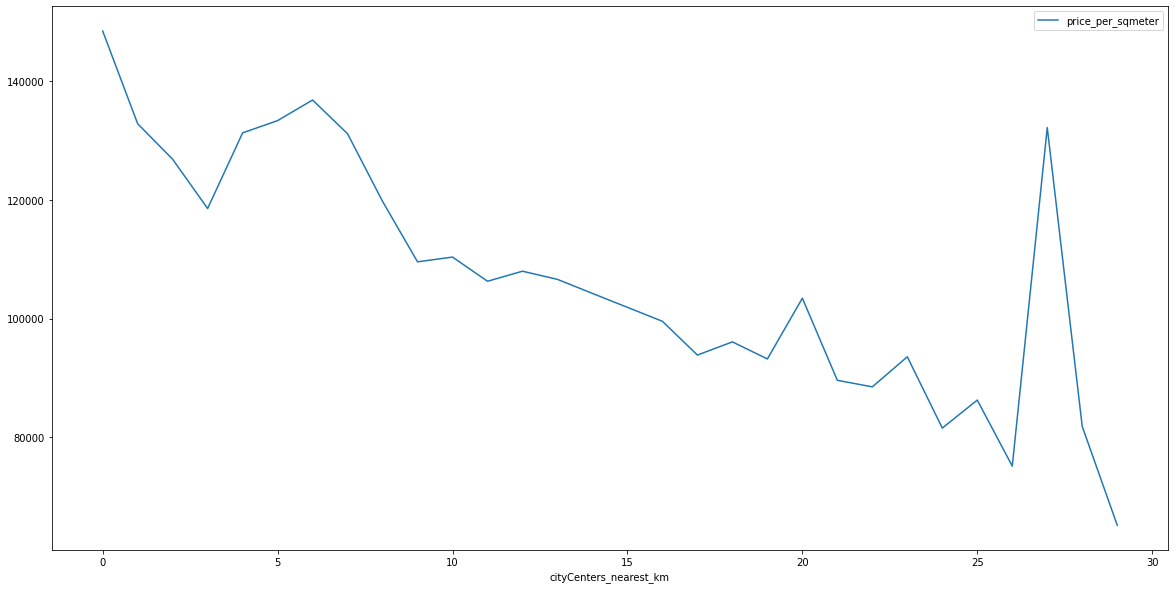

In [68]:
data['cityCenters_nearest_km'] = data['cityCenters_nearest']/1000
data['cityCenters_nearest_km'] = data['cityCenters_nearest_km'].fillna(999999)
data['cityCenters_nearest_km'] = data['cityCenters_nearest_km'].astype('int')
pivot_table_km = data.query('locality_name=="Санкт-Петербург" and cityCenters_nearest_km != 999999').pivot_table(index='cityCenters_nearest_km', values='price_per_sqmeter', aggfunc='mean')
pivot_table_km.plot(figsize=(20, 10))
pivot_table_km

Судя по графику, центром будет радиус в 7 км. 

Выделим квартиры в центре, взяв за радиус 7 км. 

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b>
<br>Отличный анализ 👍
</div>

<div class="alert alert-warning">
<b>⚠️ Комментарий ревьюера v1:</b> 
<br>Опять же, откуда взялись задания ниже? Это было в старой версии проекта, которую можно теперь найти только в интернете
</div>

### Общий вывод

В результате выполнения исследования были сделаны следующие выводы: 

1. Относительно общей, жилой площади и площади кухни: 
 - Чаще всего размещаются объявления по квартирам с общей площадью от 30 до 50 м2 и от 50 до 70 м2, нежели с площадью 30 м2 и от 100 до 200 м2, жилой площадью - от 30 до 45 м2 и от 50 до 60 м2, площадью кухни - от 5 до 15 м2.
 
2. Относительно стоимости квартиры: 
 - Наибольшее количество квартир со стоимостью от 3,5 до 5 млн. рублей, наименьшее - со стоимостью свыше 10 млн. рублей.
 
3. Относительно количества комнат: 
 - Наибольшее количество квартир - с комнатами от 1 до 5. В объявлениях лидируют двухкомнатные, однокомнатные и трехкомнатные квартиры, в то время как наименьший удельный вес приходится на квартиры с 5-7 комнатами.
 
4. Относительно высоты потолка: 
 - Наибольший пик - высота потолка от 2,4 до 3 метров. Кроме того, не забываем, что в некоторых случаях аномальные значения менее 2 м и более 5 м (например, 100 м и 1 м потолки), а также пропуски были заменены медианными значениями, составившими 2,7 м, что соответствует строительным нормам.
 
5. Относительно этажа: 
 - Наибольшее количество объявлений на Яндекс.Недвижимости - квартиры, расположенные на 1 - 6 этажах. Далее, начиная с 7 этажа, количество квартир значительно снижается и достигает минимума к 27 этажу.
 - Наибольшее количество объявлений приходится на этажи, отличные от первого и последнего, а наименьшее - на первый этаж.
 - наибольшее количество объявлений в пятиэтажках, восьмиэтажках и девятиэтажках, далее - двенадцатиэтажки, пятнадцатиэтажки, а также четырехэтажки и двадцатипятиэтажки.
 
6. Относительно удаленности от центра, аэропорта, парка: 
 - Наибольшее количество объявлений приходится на диапазон от 8 до 19 км и 3 до 6 км от центра города.
 - Пик объявлений приходится на расстояние от 40 до 700 метров до ближайшего парка.
 - ик объявлений приходится на расстояние от 18 до 40 км до ближайшего аэропорта. 
 
7. Относительно периода размещения объявления: 
 - Наибольшее количество объявлений было размещено по вторникам, четвергам, пятницам и средам, наименьшее - по воскресеньям. Относительно месяца размещения объявления: наибольшее количество объявлений размещено с февраля по апрель и с сентября по ноябрь. В январе, мае и декабре - наименьшее размещение объявлений.
 
8. Относительно срока продажи квартир: 
 - Чаще всего квартиру продают за 95 дней. быстрым считается срок продажи до 45 дней, 2а долгим - срок более 230 дней. При этом есть объекты, которые не продавались в течение нескольких лет. 
 - Есть большое количество квартир, проданных всего за несколько дней после публикации.
 
9. Относительно факторов, влияющих на стоимость квартиры: 
 - На стоимость больше влияет количество комнат. Так, наибольшая стоимость у пяти- и шестикомнатных квартир, в то время, как наименьшая стоимость квадратного метра у квартир с 1 - 3 комнатами.  
 - Первый этаж значительно дешевле остальных вариантов. Также стоимость квартиры на последнем этаже ниже, чем на остальных, кроме первого.
 - Цена квартиры зависит от дня недели размещения объявления о продаже. Так, объявления, размещенные во вторник, среду и четверг - самые дорогие по стоимости квартир, а размещенные в пятницу и воскресенье - самые дешевые 
 - Самая высокая цена за квартиру приходится на апрель, декабрь и август, а самая низкая - в июне и октябре. Кроме того, волнообразность графика говорит об определенных колебаниях, означающих присутствие сезонности на рынке недвижимости - в конце весны-начале лета и в октябре размещено наименьшее количество объявлений и стоимость квартиры в объявлениях, размещенных в этом промежутке времени, так же является наименьшей по сравнению с другими месяцами года.
 
10. Относительно стоимость квадратного метра в топ-10 населённых пунктов:
 - Самая дорогая недвижимость в Санкт-Петербурге, Пушкине, деревне Кудрово и поселке Парлогово. Далее идут Мурино, Шушары, Колпино. Самые низкие цены за метр квадратный - Всеволжске, Гатчине и Выборге. 
 
11. Относительно ситуации на рынке недвижимости: 
 - Начиная с 2014 года начался спад на рынке недвижимости. В 2016-2018 гг. была наименьшая стоимость за квадратный метр, однако, начиная с 2018 года начался подъем цен и в 2019 году уровень цен достиг уровня середины 2015 года.

<div class="alert alert-danger">
<b>❌ Комментарий ревьюера v1:</b> 
<br>После всех внесённых правок, обязательно перепроверь общий вывод и промежуточные выводы и поправь их по необходимости
</div>

<div class="alert alert-danger">
<b>❌ Итоговый комментарий ревьюера v1:</b> 
<br>Ты хорошо потрудилась, большая часть работы сделана, но остаётся внести следующие правки:
<br>- отбросить аномальные значения (площадь квартиры, стоимость, количество комнат)
<br>- изучить общую стоимость, а не цену за квадратный метр
<br>- поправить выводы там, где это необходимо
</div>


<div class="alert alert-info">
<b>Комментарий Екатерины Тиньковой:</b>
Все обязательные правки внесены. Проверь, пожалуйста, проект еще раз. :) <br>
</div> 

<div class="alert alert-success">
<b>✔️ Итоговый комментарий ревьюера v2:</b>
<br>Все правки выполнены. Молодец!
<br>Проделана огромная работа! У тебя подробные, понятные и логичные выводы, которые ты подкрепляешь фактами. Были использованы разные графики и способы, чтобы как можно более тщательно изучить данные и у тебя это получилось! 
<br>Я рад был поработать над проверкой твоей работы) В качестве дополнительного материала для изучения могу порекомендовать следующий ресурс:

	https://www.python-graph-gallery.com/
<br>В нем содержится большая библиотека графиков с готовым кодом, который можно использовать при работе.
<br>Поздравляю со сдачей проекта и желаю удачи в дальнейшем обучении! 😉    
</div>

**Чек-лист готовности проекта**

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод `info()`, гистограммы и т.д.)
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения там, где это возможно
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  устранены неявные дубликаты в названиях населённых пунктов
- [x]  устранены редкие и выбивающиеся значения (аномалии) во всех столбцах
- [x]  посчитано и добавлено в таблицу: цена одного квадратного метра
- [x]  посчитано и добавлено в таблицу: день публикации объявления (0 - понедельник, 1 - вторник и т.д.)
- [x]  посчитано и добавлено в таблицу: месяц публикации объявления
- [x]  посчитано и добавлено в таблицу: год публикации объявления
- [x]  посчитано и добавлено в таблицу: тип этажа квартиры (значения — «первый», «последний», «другой»)
- [x]  посчитано и добавлено в таблицу: расстояние в км до центра города
- [x]  изучены и описаны следующие параметры:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - этаж квартиры;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего аэропорта;
        - расстояние до ближайшего парка;
        - день и месяц публикации объявления
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней «висело» каждое объявление.
    - Постройте гистограмму.
    - Посчитайте среднее и медиану.
    - В ячейке типа markdown опишите, сколько обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?"
- [x]  выполнено задание: "Какие факторы больше всего влияют на общую (полную) стоимость объекта? Постройте графики, которые покажут зависимость цены от указанных ниже параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы."
        - общей площади;
        - жилой площади;
        - площади кухни;
        - количество комнат;
        - типа этажа, на котором расположена квартира (первый, последний, другой);
        - даты размещения (день недели, месяц, год);
- [x]  выполнено задание: "Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце `locality_name`."
- [x]  выполнено задание: "Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города."
- [x]  в каждом этапе есть промежуточные выводы
- [x]  есть общий вывод